### **Install required dependencies**

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

### **Importing required dependencies**

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## **Linear Regression based problems**

---

### 1. Create a dataset using having two columns one is CGPA whose values are in between 0 to 10 and the other column is of package(LPA) whose value are in range od 0 to 12.

### 2. What is Simple Linear Regression?

### 3. Explain the mathematical OLS form of Simple Linear Regression.

### 4. Create a function of Simple Linear Regression and apply it on the created dataset where target column will be `package(LPA)`.

### 5. Compare the predicted data of your own created Simple Linear Regression and Linear regression using SKlearn.

### 6. For this question generate a dataset. On the gerated dataset, build a simple linear regression model with gradient descent from scratch. Implement functions for computing the cost function, updating coefficients, and training the model. Plot the graph for each iteration.

### You can use the following code to generate data:

```python
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
```

### 1. Create a dataset using having two columns one is CGPA whose values are in between 0 to 10 and the other column is of package(LPA) whose value are in range of 0 to 12.

In [ ]:
mu, sigma = 7.5, 1 # mean and standard deviation
CGPA = np.random.default_rng().normal(mu, sigma, 100).tolist()
CGPA = [9.8 if marks>9.8 else round(marks,1) for marks in CGPA]
placement_df = pd.DataFrame(CGPA)
placement_df.columns = ['CGPA']

# Create package function:
def package(data_frame):
  if data_frame['CGPA']>=9.0: return round(random.uniform(7.5, 12.5),2)

  elif 7.5<=data_frame['CGPA']<9.0: return round(random.uniform(5.5, 10),2)

  elif 5<=data_frame['CGPA']<7.5: return round(random.uniform(3.2, 6.5),2)

  elif data_frame['CGPA']<4.5: return np.nan

  else: return round(random.uniform(3.2, 5.5),2)

placement_df['package(LPA)'] = placement_df.apply(package, axis = 1)
placement_df.head()

,CGPA,package(LPA)
0,8.8,8.56
1,7.5,7.66
2,9.3,7.51
3,7.7,7.87
4,8.5,7.75


- Visualizing the created dataset:

<Axes: xlabel='CGPA', ylabel='package(LPA)'>

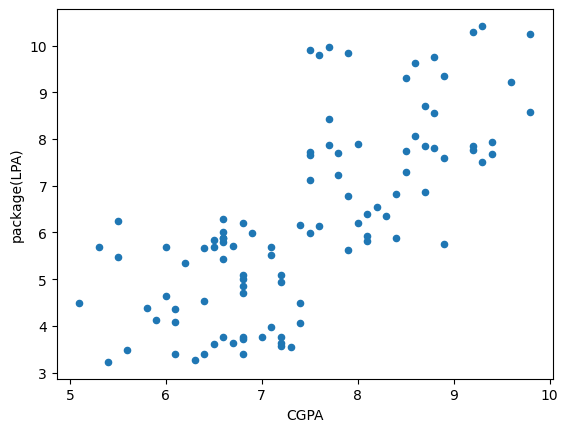

In [ ]:
placement_df.plot(x = 'CGPA', y = 'package(LPA)', kind = 'scatter')

### 2. What is Simple Linear Regression?

Simple linear regression is a statistical method that allows us to summarize and study the relationship between two continuous (quantitative) variables. One variable, denoted $x$, is regarded as the predictor, explanatory, or independent variable. The other variable, denoted $y$, is regarded as the response, outcome, or dependent variable.

The basic principle of simple linear regression is that the mean of the dependent variable $(y)$ can be modeled as a linear function of the independent variable $(x)$. This can be written as the equation:

$y = b + w*x$

where,

$b$ is bias or the intercept, which is the value of $y$ when $x$ is $0$.
$w$ is the slope, which tells us how much $y$ changes for a one-unit change in $x$.
The line that represents this equation is called the regression line.



### 3. Explain the mathematical OLS form of Simple Linear Regression.

The mathematical OLS form of simple linear regression is:

$y = b + w*x + ε$

where,

- $y$ is the dependent variable.
- $x$ is the independent variable.
- $b$ is the intercept, which is the value of $y$ when $x$ is $0$.
- $w$ is the slope, which tells us how much $y$ changes for a one-unit change in $x$.
- $ε$ is the error term, which is the difference between the actual value of $y$ and the predicted value of $y$.

The OLS method is a way of estimating the parameters b0 and b1 that minimizes the sum of the squared residuals $(ε)$. This means that the OLS estimates are the values of $b$ and $w$ that make the predicted values of $y$ as close as possible to the actual values of $y$.

The OLS estimates can be calculated using the following formulas:

$b = \bar y - w* \bar x$

$w = Σ{\frac{y_i- \bar y}{x_i- \bar x}}$

where:

- $\bar x$ is the mean of $x$.
- $\bar y$ is the mean of $y$.
- $x_i$ is $i^{th}$ value of $x$.
- $y_i$ is $i^{th}$ value of $y$.

### 4. Create a function of Simple Linear Regression and apply it on the created dataset where target column will be package(LPA).

In [ ]:
class custom_SLR:
  def __init__(self):
    self.weight = None
    self.bias = None

  def fit(self, X_train, y_train):
    numerator = 0
    denominator = 0
    X_train_mean = X_train.mean()
    y_train_mean = y_train.mean()

    for i in range(X_train.shape[0]):
      numerator = numerator + ((X_train[i]-X_train_mean)*(y_train[i]-y_train_mean))
      denominator = denominator + (X_train[i]-X_train_mean)**2

    self.weight = numerator/denominator
    self.bias = y_train_mean-(self.weight*X_train_mean)

    print(f"Weight: {round(self.weight,2)} | Bias: {round(self.bias,2)}")

  def predict(self, X_test):
    return self.weight*X_test + self.bias


- Prepairing training and testing dataset:

In [ ]:
X = placement_df.iloc[:,0].values
y = placement_df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
cst_slr = custom_SLR()

In [ ]:
cst_slr.fit(X_train , y_train)

Weight: 1.0 | Bias: 0.0


In [ ]:
y_pred_cst = cst_slr.predict(X_test)

### 5. Compare the predicted data of your own created Simple Linear Regression and Linear regression using SKlearn.

Using Sklear library:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_pred_sklear = LR.predict(X_test.reshape(-1, 1))

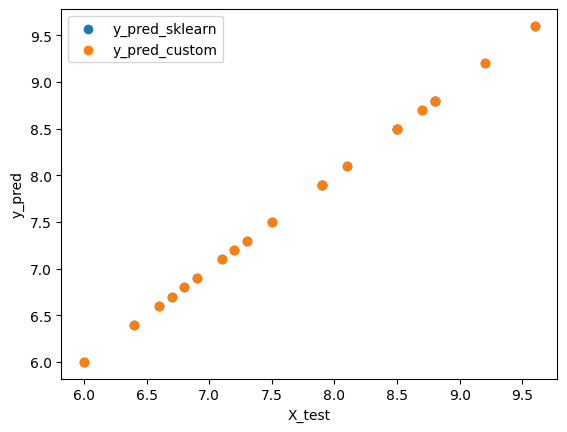

In [ ]:
plt.scatter( X_test, y_pred_sklear, label='y_pred_sklearn')
plt.scatter(X_test, y_pred_cst, label='y_pred_custom')
plt.xlabel('X_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

### 6. For this question generate a dataset. On the gerated dataset, build a simple linear regression model with gradient descent from scratch. Implement functions for computing the cost function, updating coefficients, and training the model. Plot the graph for each iteration.

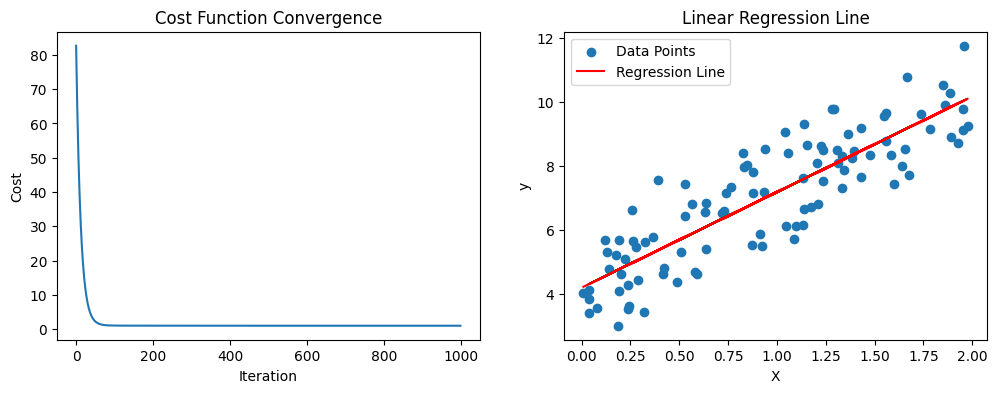

Final Coefficients (theta0, theta1): 4.20607718142562 2.9827303563323175


In [ ]:
# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Number of iterations for gradient descent
num_iterations = 1000

# Learning rate (alpha)
learning_rate = 0.01

# Initialize the coefficients (slope and intercept)
theta0 = np.random.randn()
theta1 = np.random.randn()

# Lists to store the history of cost and coefficients
cost_history = []
theta0_history = []
theta1_history = []

# Gradient Descent
for iteration in range(num_iterations):
    # Calculate the predicted values
    y_pred = theta0 + theta1 * X

    # Calculate the cost (Mean Squared Error)
    cost = np.mean((y_pred - y)**2)

    # Calculate the gradients
    gradient0 = 2 * np.mean(y_pred - y)
    gradient1 = 2 * np.mean((y_pred - y) * X)

    # Update the coefficients using the gradients
    theta0 -= learning_rate * gradient0
    theta1 -= learning_rate * gradient1

    # Append cost and coefficients to history lists
    cost_history.append(cost)
    theta0_history.append(theta0)
    theta1_history.append(theta1)

# Plot the cost function over iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), cost_history)
plt.title('Cost Function Convergence')
plt.xlabel('Iteration')
plt.ylabel('Cost')

# Plot the regression line over data points
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Data Points')
plt.plot(X, theta0 + theta1 * X, 'r', label='Regression Line')
plt.title('Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the final coefficients
print("Final Coefficients (theta0, theta1):", theta0, theta1)


## **Multiple Linear Regression based problems**:

---

### 7. What is polynomial regression, and how does it differ from linear regression in terms of modeling relationships between variables?

Polynomial regression is a type of regression analysis used to model the relationship between a dependent variable and one or more independent variables when the relationship is not linear. Unlike linear regression, which assumes a linear relationship between variables $(y = m*x + b)$, polynomial regression allows for curved and nonlinear relationships by fitting a polynomial equation to the data $(y = a + b*x + c*x^2 + ... + n*x^k)$. It extends linear regression by introducing higher-degree polynomial terms to capture more complex patterns in the data.

### 8. How do you determine the appropriate degree of polynomial for a polynomial regression model, and what are the consequences of choosing a degree that is too high or too low?

The appropriate degree of polynomial for a polynomial regression model is typically determined through trial and error or cross-validation. One common approach is to start with a low degree (e.g., linear or quadratic) and incrementally increase it while monitoring the model's performance using metrics like Mean Squared Error (MSE) or R-squared.

Choosing a degree that is too low may result in underfitting, where the model is too simplistic to capture the underlying patterns in the data. On the other hand, selecting a degree that is too high can lead to overfitting, where the model fits the noise in the data rather than the true relationship, making it perform poorly on new, unseen data.

### 9. Can you explain the concept of overfitting in the context of polynomial regression, and what techniques or methods can be used to mitigate it?

Overfitting occurs in polynomial regression when the model becomes too complex, fitting the training data perfectly but performing poorly on new data. To mitigate overfitting, techniques such as regularization can be used. Ridge regression and Lasso regression are two common forms of regularization that penalize large coefficients and prevent overemphasis on high-degree polynomial terms.

Cross-validation is also crucial in detecting and preventing overfitting. By splitting the data into training and validation sets and monitoring model performance on the validation set, you can select the degree of polynomial that strikes a balance between bias and variance.

### 10. What are the advantages and disadvantages of using polynomial regression compared to other regression techniques, such as linear regression or ridge regression?

**Advantages of polynomial regression:**

- Can capture complex, nonlinear relationships in the data.
- Provides a more flexible modeling approach when linear regression is inadequate.
- Can be useful for modeling real-world phenomena with inherent curvature.

**Disadvantages of polynomial regression:**

- Prone to overfitting with high-degree polynomials.
- Interpretability can be challenging as the model becomes more complex.
- Extrapolation beyond the range of the data can be unreliable.

## **Regularization based problems:**

---

For Regularization based problems use the given dataset: ft_2011.csv

### 11. Write Python code to implement Ridge Regression (L2 regularization) for a linear regression problem. Use a sample dataset and demonstrate how regularization helps in reducing overfitting.

### 12. Create Python code to implement Lasso Regression (L1 regularization) for linear regression. Use a different dataset and compare the results with Ridge Regression. Explain when you might prefer Lasso over Ridge.

### 13. Write code to perform hyperparameter tuning for a Ridge Regression model. Use techniques like cross-validation and grid search to find the optimal alpha (regularization strength) value. Apply it to a real dataset.

### 14. Similar to question 3, but focus on hyperparameter tuning for a Lasso Regression model. Experiment with different alpha values and evaluate their impact on model performance.

### 15. Implement Ridge Regression with feature scaling (e.g., using StandardScaler or MinMaxScaler) on a dataset with features of varying scales. Compare the results to a non-regularized model without feature scaling.

### 16. Create Python code to implement Elastic Net Regression, which combines L1 and L2 regularization. Use a dataset and compare the performance of Elastic Net with Ridge and Lasso Regression. Discuss the advantages of Elastic Net in certain scenarios.

### 17. Extend the Ridge or Lasso Regression implementation to work with polynomial regression. Demonstrate how regularization can be applied to polynomial regression to prevent overfitting and improve model generalization.

In [ ]:
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/gt_2011.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [ ]:
#The given dataset is having two output columns to predict that is 'CO' and 'NOX'
X = df.iloc[:,:-2]
y_1 = df.iloc[:,-2]
y_2 = df.iloc[:,-1]

In [ ]:
y_1.shape

(7411,)

We'll be using the y_2 as our target column.

11. Write Python code to implement Ridge Regression (L2 regularization) for a linear regression problem. Use a sample dataset and demonstrate how regularization helps in reducing overfitting.

In [ ]:
import numpy as np
from sklearn.linear_model import (Ridge, LinearRegression)
from sklearn.model_selection import train_test_split


#Splitting the dataset into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_1, random_state = 42)

#Using Linear regression:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print(f"Coefficients corresponding to input features after applying Linear Regression: {lr.coef_}")
print(f"Intercept value corresponding after applying Linear Regression: {lr.intercept_}")
print(f"Linear regression R_2 score: {lr.score}")
print("=="*20)



# Instantiate and fit a Ridge Regression modele
alpha_value = [0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_value:
  ridge_reg = Ridge(alpha=i)  # Adjust alpha for regularization strength
  ridge_reg.fit(X_train, y_train)
  ridge_reg.predict(X_test)

  # Print the coefficients and intercept
  print(f"Value of alpha for ridge: {i}")
  print("Ridge Coefficients:", ridge_reg.coef_)
  print("Ridge Intercept:", ridge_reg.intercept_)
  print("Ridge Regression R_2 score", ridge_reg.score)
  print("**"*20)

Coefficients corresponding to input features after applying Linear Regression: [ 0.01275294 -0.00363162 -0.00301849  0.50055272 -0.98889017  0.12465505
 -0.39968075 -0.06501533 -0.25436685]
Intercept value corresponding after applying Linear Regression: 122.95131354704704
Linear regression R_2 score: <bound method RegressorMixin.score of LinearRegression()>
Value of alpha for ridge: 0.001
Ridge Coefficients: [ 0.01275263 -0.00363149 -0.00301851  0.50055053 -0.98888382  0.12465359
 -0.39967835 -0.06501556 -0.25435429]
Ridge Intercept: 122.9511926419078
Ridge Regression R_2 score <bound method RegressorMixin.score of Ridge(alpha=0.001)>
****************************************
Value of alpha for ridge: 0.01
Ridge Coefficients: [ 0.01274977 -0.00363032 -0.00301866  0.5005308  -0.98882672  0.12464041
 -0.39965671 -0.06501764 -0.25424131]
Ridge Intercept: 122.95010455349454
Ridge Regression R_2 score <bound method RegressorMixin.score of Ridge(alpha=0.01)>
**********************************

ridge regularization helps reduce overfitting by adding a penalty term that encourages smaller coefficient values and a more balanced use of features. This regularization technique strikes a balance between fitting the training data and preventing the model from being too complex, making it a valuable tool in improving a model's generalization performance.

12. Create Python code to implement Lasso Regression (L1 regularization) for linear regression. Use a different dataset and compare the results with Ridge Regression. Explain when you might prefer Lasso over Ridge.

In [ ]:
from sklearn.linear_model import (Lasso, LinearRegression)
from sklearn.model_selection import train_test_split


#Splitting the dataset into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_1, random_state = 42)

#Using Linear regression:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print(f"Coefficients corresponding to input features after applying Linear Regression: {lr.coef_}")
print(f"Intercept value corresponding after applying Linear Regression: {lr.intercept_}")
print("=="*20)



# Instantiate and fit a Ridge Regression modele
alpha_value = [0.001, 0.01, 0.1, 1, 10, 100]
for i in alpha_value:
  lasso_reg = Lasso(alpha=i)  # Adjust alpha for regularization strength
  lasso_reg.fit(X_train, y_train)
  lasso_reg.predict(X_test)

  # Print the coefficients and intercept
  print(f"Value of alpha for ridge: {i}")
  print("Lasso Coefficients:", lasso_reg.sparse_coef_)
  print("Lasso Intercept:", lasso_reg.intercept_)
  print("**"*20)

Coefficients corresponding to input features after applying Linear Regression: [ 0.01275294 -0.00363162 -0.00301849  0.50055272 -0.98889017  0.12465505
 -0.39968075 -0.06501533 -0.25436685]
Intercept value corresponding after applying Linear Regression: 122.95131354704704
Value of alpha for ridge: 0.001
Lasso Coefficients:   (0, 0)	0.002076098871752694
  (0, 1)	-0.0004719414139805449
  (0, 2)	-0.003500272278078292
  (0, 3)	0.4562809747825512
  (0, 4)	-0.8141035929353418
  (0, 5)	0.09496694541131331
  (0, 6)	-0.34726909591429517
  (0, 7)	-0.07822337524313411
  (0, 8)	-0.03613162714088994
Lasso Intercept: 118.45741281513214
****************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.366e+03, tolerance: 2.003e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+01, tolerance: 2.003e+00
  model = cd_fast.enet_coordinate_descent(


Value of alpha for ridge: 0.01
Lasso Coefficients:   (0, 1)	0.008280145179695412
  (0, 2)	-0.004328333853361116
  (0, 3)	0.3191510754496702
  (0, 4)	-0.5209484366638075
  (0, 5)	0.02349100496531001
  (0, 6)	-0.24097455064761944
  (0, 7)	-0.04697777048272979
Lasso Intercept: 117.69226858155808
****************************************
Value of alpha for ridge: 0.1
Lasso Coefficients:   (0, 0)	-0.005101732239815988
  (0, 1)	0.02289495992594522
  (0, 2)	-0.004535253570340478
  (0, 5)	-0.09141116159181285
  (0, 6)	-0.06484047158987877
Lasso Intercept: 113.26631874150057
****************************************
Value of alpha for ridge: 1
Lasso Coefficients:   (0, 1)	0.007143303843666624
  (0, 5)	-0.08324151736079409
  (0, 6)	-0.049537683089912354
Lasso Intercept: 111.6001749626641
****************************************
Value of alpha for ridge: 10
Lasso Coefficients:   (0, 5)	-0.03708862209226953
Lasso Intercept: 41.80501785421225
****************************************
Value of alpha fo

Lasso can perform variable selection, while Ridge does not. This is because Lasso can shrink some coefficients to exactly zero, which effectively removes those variables from the model. This can be useful for models with many features, as it can help to reduce overfitting and improve interpretability.

When to choose Lasso over Ridge:
- When you want to perform variable selection and reduce the number of features in your model.
- When your data is noisy or contains outliers.
- When you have a sparse problem, meaning that only a few features are truly important.

13. Write code to perform hyperparameter tuning for a Ridge Regression model. Use techniques like cross-validation and grid search to find the optimal alpha (regularization strength) value.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a Ridge Regression model
ridge_reg = Ridge()

# Define a range of alpha values for tuning
alphas = [0.01, 0.1, 1, 10, 100]

# Perform hyperparameter tuning using GridSearchCV
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print the best alpha value and corresponding score
print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Score:", grid_search.best_score_)

Best Alpha: 10
Best Score: 0.5343319631896974


14. Write code to perform hyperparameter tuning for a Lasso Regression model. Experiment with different alpha values and evaluate their impact on model performance.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Load a different real dataset
# X, y = load_another_data()

# Create a Lasso Regression model
lasso_reg = Lasso()

# Define a range of alpha values for tuning
alphas = [0.01, 0.1, 1, 10]

# Perform hyperparameter tuning using GridSearchCV
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best alpha value and corresponding score
print("Best Alpha:", grid_search.best_params_['alpha'])
print("Best Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.289e+01, tolerance: 1.563e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+01, tolerance: 1.602e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.239e+02, tolerance: 1.640e

Best Alpha: 0.01
Best Score: 0.5242177510753663


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+01, tolerance: 2.003e+00
  model = cd_fast.enet_coordinate_descent(


15. Implement Ridge Regression with feature scaling (e.g., using StandardScaler or MinMaxScaler) on a dataset with features of varying scales. Compare the results to a non-regularized model without feature scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Load a dataset with features of varying scales
# X, y = load_data_with_scaling()

# Create a Ridge Regression model within a pipeline with feature scaling
ridge_reg = Ridge(alpha=1.0)
scaler = StandardScaler()
pipeline = Pipeline([('scaler', scaler), ('ridge', ridge_reg)])
pipeline.fit(X_train, y_train)

# Print the coefficients and intercept
print("Ridge Coefficients:", ridge_reg.coef_)
print("Ridge Intercept:", ridge_reg.intercept_)

Ridge Coefficients: [ 8.68563499e-02  2.98549956e-03 -4.51157719e-02  3.23352668e-01
 -3.67018785e+00  1.42973079e+00 -2.85616390e+00 -8.68269659e-01
 -1.74584925e-01]
Ridge Intercept: 1.5745957627923708


16. Create Python code to implement Elastic Net Regression, which combines L1 and L2 regularization. Use a dataset and compare the performance of Elastic Net with Ridge and Lasso Regression. Discuss the advantages of Elastic Net in certain scenarios.

In [ ]:
from sklearn.linear_model import ElasticNet

# Generate or load a dataset
# X, y = generate_or_load_data()

# Instantiate and fit an Elastic Net Regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio
elastic_net.fit(X_train, y_train)

# Print the coefficients and intercept
print("Elastic Net Coefficients:", elastic_net.coef_)
print("Elastic Net Intercept:", elastic_net.intercept_)

Elastic Net Coefficients: [-0.          0.01714946 -0.          0.         -0.         -0.08711266
 -0.05768016  0.          0.        ]
Elastic Net Intercept: 110.0854598459056


Elastic net regularization has a number of advantages over both lasso and ridge regularization in certain scenarios.

- **Handling multicollinearity:** Elastic net regularization can handle multicollinearity better than lasso regularization. This is because elastic net regularization can group correlated features and select the most representative ones. Lasso regularization, on the other hand, may arbitrarily select one feature over another in the presence of multicollinearity.
- **Reducing model complexity:** Elastic net regularization can reduce model complexity more effectively than ridge regularization. This is because elastic net regularization can eliminate irrelevant features, while ridge regularization may keep too many features that are not relevant.
- **Achieving a better bias-variance trade-off:** Elastic net regularization can achieve a better trade-off between bias and variance than lasso and ridge regularization. This is because elastic net regularization can balance between feature selection and feature preservation.

In addition to these general advantages, elastic net regularization can also be particularly useful in the following scenarios:

- **When there are more features than observations:** When there are more features than observations, lasso regularization may select only one feature from a group of correlated features, while ridge regression may keep them all. Elastic net regularization can select a subset of correlated features and avoid the instability of lasso regression.
- **When the data is noisy:** Elastic net regularization is more robust to noise than lasso regularization. This is because the L2 penalty in elastic net regularization helps to smooth out the model and reduce the impact of noise.
- **When the data is sparse:** Elastic net regularization can recover the true model coefficients more accurately in settings where the data is sparse. This is because the L1 penalty in elastic net regularization helps to select the most important features and reduce the impact of irrelevant features.

17. Extend the Ridge or Lasso Regression implementation to work with polynomial regression. Demonstrate how regularization can be applied to polynomial regression to prevent overfitting and improve model generalization.

- Using Ridge regression:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform the input features
X_poly = poly.fit_transform(X_train)

# Create the Ridge regression object
ridge = Ridge(alpha=0.1)

# Fit the model to the transformed data
ridge.fit(X_poly, y_train)

print("Ridge Coefficients:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)
print("Ridge Regression R_2 score", ridge.score)

Ridge Coefficients: [ 0.00000000e+00 -5.26289604e+00 -2.68057893e+00 -3.33981375e-01
  1.82138292e-01  1.61734551e+00  9.36181517e-01  3.08405891e+00
  9.70728296e-01 -3.25511543e-01 -2.51929356e-03 -1.68269118e-03
 -1.94216127e-03  6.27561300e-02  1.87982921e-02 -1.46703319e-02
  3.49346941e-02  2.41430586e-02  3.51614638e-03  1.61970393e-03
 -2.99879677e-04  1.56863499e-03  4.12988135e-02 -5.15763874e-03
  8.38925598e-03 -4.15096857e-03 -2.14852368e-03 -1.38892996e-04
  1.87928200e-02  1.86830399e-03  3.63680369e-03 -4.50703154e-03
 -4.29496277e-03 -2.82760952e-02 -4.89975982e-01 -6.43201856e-02
 -6.48672918e-02  9.22558865e-02  1.85259453e-01 -2.73654237e-01
 -3.13680379e-01  5.68327369e-02 -1.82407923e-01 -2.16098645e-01
  3.19776578e+00  2.11786623e-02 -5.61556367e-02 -3.20151921e-02
 -6.48297381e-01  3.01220108e-02  4.90983849e-02  1.11201006e+00
  4.04062241e-02  3.97976890e-01 -1.33690108e+00]
Ridge Intercept: 68.29358525222767
Ridge Regression R_2 score <bound method Regressor

- Using Lasso regression:

In [ ]:
# Create the polynomial features object
poly = PolynomialFeatures(degree=2)

# Transform the input features
X_poly = poly.fit_transform(X_train)

# Create the Lasso regression object
lasso = Lasso(alpha=0.1)

# Fit the model to the transformed data
lasso.fit(X_poly, y_train)

print("Ridge Coefficients:", lasso.coef_)
print("Ridge Intercept:", lasso.intercept_)
print("Ridge Regression R_2 score", lasso.score)

Ridge Coefficients: [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.89542018e-03 -2.27843081e-04
 -6.43543110e-04 -0.00000000e+00  2.81762705e-03  1.12972513e-04
  4.40235659e-05  1.02745978e-03 -1.14114593e-03  1.33750071e-04
  7.31702752e-05 -8.32340803e-04 -1.95023293e-04 -1.09005444e-04
 -2.72411875e-04  4.50955337e-05 -3.49494369e-05 -1.20788136e-04
  0.00000000e+00  2.94546380e-04 -7.19029773e-05 -2.32043682e-05
  1.34885616e-04  1.31967289e-03  0.00000000e+00  0.00000000e+00
  4.20861028e-04  2.95898610e-03 -6.27177455e-03 -0.00000000e+00
 -1.84257162e-02  6.88802424e-04  8.22838257e-04 -3.53506024e-03
 -0.00000000e+00  3.34958595e-05 -2.26170155e-05  8.56916012e-05
 -2.29085515e-04 -7.94786137e-05  1.89088606e-04  1.78688018e-04
 -6.84306782e-04 -1.28516194e-03 -0.00000000e+00]
Ridge Intercept: 112.58309251873364
Ridge Regression R_2 score <bound method Regresso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.969e+03, tolerance: 2.003e+00
  model = cd_fast.enet_coordinate_descent(


Regularization can be applied to polynomial regression to prevent overfitting and improve model generalization in the following ways:

- **Shrinking the coefficients of the polynomial terms:** Regularization shrinks the coefficients of the polynomial terms, which prevents the model from becoming too complex and fitting too closely to the training data. This can help to reduce overfitting and improve model generalization.
- **Encouraging the model to learn smoother functions:** Regularization encourages the model to learn smoother functions, which are less likely to overfit the training data. This is because smoother functions are less sensitive to small changes in the input data.
- **Reducing the variance of the model:** Regularization reduces the variance of the model, which makes it more robust to noise in the training data. This can help to improve model generalization.

## **Problems based on Logistic regression:**

---

### 1. Implement a logistic regression model from scratch in Python using NumPy. Your implementation should include functions for training the model using gradient descent and making predictions. Test your implementation on a binary classification dataset.

### 2. Extend your logistic regression implementation from question 1 to include L1 and L2 regularization options. Allow users to choose the type and strength of regularization. Train and evaluate the regularized model on a dataset of your choice.

### 3. Implement a multiclass logistic regression classifier from scratch in Python. Use the one-vs-all (OvA) strategy to handle multiple classes. Train the model on a dataset with more than two classes and evaluate its accuracy.

### 4. Create a logistic regression model in Python that incorporates k-fold cross-validation. Use a suitable dataset, and perform k-fold cross-validation to estimate the model's performance. Calculate and display relevant metrics such as accuracy, precision, recall, and F1-score for each fold.



### 1. Implement a logistic regression model from scratch in Python using NumPy. Your implementation should include functions for training the model using gradient descent and making predictions. Test your implementation on a binary classification dataset.

In [ ]:
# Creating Logistic regression class
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Gradient calculation
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if p >= 0.5 else 0 for p in predictions]

In [ ]:
#Loading Iris dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df.columns = ['column_1', 'column_2', 'column_3', 'column_4']
df['target'] = pd.Series(y)

#Removing the rows with having target value 2
df = df[df['target'] != 2]

# Shuffling all the rows' order
df = shuffle(df, random_state = 42)

X = df[['column_1', 'column_2' , 'column_3', 'column_4']]
y = df['target']

# Train test slipt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Instantiate and train the model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

for i in zip(y_test, predictions):
  print(f"Real data: {i[0]} || Predicted data: {i[1]}")

Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0
Real data: 1 || Predicted data: 1
Real data: 0 || Predicted data: 0


### 2. Extend your logistic regression implementation from question 1 to include L1 and L2 regularization options. Allow users to choose the type and strength of regularization. Train and evaluate the regularized model on a dataset of your choice.

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, reg_strength=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Calculate the predicted values
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute the gradients with or without regularization
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            if self.regularization == 'L1':
                dw += (self.reg_strength / m) * np.sign(self.weights)
            elif self.regularization == 'L2':
                dw += (self.reg_strength / m) * self.weights

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [ ]:
#Loading Iris dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df.columns = ['column_1', 'column_2', 'column_3', 'column_4']
df['target'] = pd.Series(y)

# Shuffling all the rows' order
df = shuffle(df, random_state = 42)

X = df[['column_1', 'column_2' , 'column_3', 'column_4']]
y = df['target']

# Train test slipt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Initialize and train the logistic regression model with L1 regularization
model_l1 = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='L1', reg_strength=0.1)
model_l1.fit(X_train, y_train)

# Make predictions on the test data
y_pred_l1 = model_l1.predict(X_test)

# Evaluate the model with L1 regularization
accuracy_l1 = np.mean(y_pred_l1 == y_test)
print("Accuracy with L1 regularization:", accuracy_l1)

# Initialize and train the logistic regression model with L2 regularization
model_l2 = LogisticRegression(learning_rate=0.1, num_iterations=1000, regularization='L2', reg_strength=0.1)
model_l2.fit(X_train, y_train)

# Make predictions on the test data
y_pred_l2 = model_l2.predict(X_test)

# Evaluate the model with L2 regularization
accuracy_l2 = np.mean(y_pred_l2 == y_test)
print("Accuracy with L2 regularization:", accuracy_l2)

Accuracy with L1 regularization: 0.36666666666666664
Accuracy with L2 regularization: 0.36666666666666664


### 3. Implement a multiclass logistic regression classifier from scratch in Python. Use the one-vs-all (OvA) strategy to handle multiple classes. Train the model on a dataset with more than two classes and evaluate its accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class MulticlassLogisticRegressionOvA:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_val=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization
        self.lambda_val = lambda_val
        self.models = {}

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

        if self.regularization == 'l1':
            reg_term = (self.lambda_val / (2 * m)) * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            reg_term = (self.lambda_val / (2 * m)) * np.sum(self.weights**2)
        else:
            reg_term = 0

        return cost + reg_term

    def fit(self, X, y):
        self.classes = np.unique(y)
        num_samples, num_features = X.shape

        for c in self.classes:
            binary_y = np.where(y == c, 1, 0)
            self.models[c] = {}
            self.models[c]['weights'] = np.zeros(num_features)
            self.models[c]['bias'] = 0

            for _ in range(self.num_iterations):
                linear_model = np.dot(X, self.models[c]['weights']) + self.models[c]['bias']
                predictions = self.sigmoid(linear_model)

                dw = (1 / num_samples) * np.dot(X.T, (predictions - binary_y))
                db = (1 / num_samples) * np.sum(predictions - binary_y)

                if self.regularization == 'l1':
                    dw += (self.lambda_val / num_samples) * np.sign(self.models[c]['weights'])
                elif self.regularization == 'l2':
                    dw += (self.lambda_val / num_samples) * self.models[c]['weights']

                self.models[c]['weights'] -= self.learning_rate * dw
                self.models[c]['bias'] -= self.learning_rate * db

    def predict(self, X):
        num_samples = X.shape[0]
        class_scores = np.zeros((num_samples, len(self.classes)))

        for c in self.classes:
            linear_model = np.dot(X, self.models[c]['weights']) + self.models[c]['bias']
            class_scores[:, c] = linear_model

        return np.argmax(class_scores, axis=1)

In [ ]:
#Loading Iris dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df.columns = ['column_1', 'column_2', 'column_3', 'column_4']
df['target'] = pd.Series(y)


# Shuffling all the rows' order
df = shuffle(df, random_state = 42)

X = df[['column_1', 'column_2' , 'column_3', 'column_4']]
y = df['target']

# Train test slipt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Instantiate and train a multiclass logistic regression model using OvA
model = MulticlassLogisticRegressionOvA(learning_rate=0.01, num_iterations=1000, regularization='l2', lambda_val=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Multiclass Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Multiclass Logistic Regression Results:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.73      0.84        11
           2       0.73      1.00      0.84         8

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30



### 4. Create a logistic regression model in Python that incorporates k-fold cross-validation. Use a suitable dataset, and perform k-fold cross-validation to estimate the model's performance. Calculate and display relevant metrics such as accuracy, precision, recall, and F1-score for each fold.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load a sample dataset (e.g., the Iris dataset)
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

# Define the number of folds for cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and fit a logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate the mean and standard deviation of each metric across folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

std_accuracy = np.std(accuracy_scores)
std_precision = np.std(precision_scores)
std_recall = np.std(recall_scores)
std_f1 = np.std(f1_scores)

# Display the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Mean': [mean_accuracy, mean_precision, mean_recall, mean_f1],
    'Standard Deviation': [std_accuracy, std_precision, std_recall, std_f1]
})

print("Cross-Validation Results:")
print(results)


Cross-Validation Results:
      Metric      Mean  Standard Deviation
0   Accuracy  0.973333            0.024944
1  Precision  0.977068            0.020472
2     Recall  0.973333            0.024944
3   F1 Score  0.973291            0.024956


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## **Problems based on metric calculation in regression**

---

For this section you can use dataset for regresion or you can create your own custom dataset and apply any of the regression algorithms.

### 1.Calculate the Mean Absolute Error between the true values y_true and predicted values y_pred using NumPy.

### 2.Compute the Mean Squared Error between y_true and y_pred using NumPy.

### 3.Implement a function to calculate the Root Mean Squared Error given y_true and y_pred.

### 4.Create a Python function to calculate the R-squared (coefficient of determination) score using scikit-learn.

### 5.Write a Python function to compute the Mean Absolute Percentage Error for regression models.

### 6.Implement a Python function to calculate the Adjusted R-squared score, considering the number of predictors and the total data points.

### 7.Calculate the Residual Sum of Squares for a linear regression model with given data.

### 8.Create a Python function to calculate the Mean Bias Deviation, a measure of bias in predictions.

### 9.Implement the Huber loss function for robust regression in Python.

### 10.Write a Python function to compute the Explained Variance Score, which quantifies the proportion of variance in the dependent variable explained by the independent variables.

- Creating custom datset

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=6, n_informative=4, n_targets=1, noise=2.38, random_state=42)
X = pd.DataFrame(X, columns = ['Column_1','Column_2','Column_3','Column_4','Column_5','Column_6'])
y = pd.Series(y, name = 'Target')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24, test_size = 0.2)

- Here for prediction e'll be using Linear regression algorithms.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

#Storing the predictions in 'y_pred'
y_pred = lr.predict(X_test)

As we have the required variables.

### 1.Calculate the Mean Absolute Error between the true values y_true and predicted values y_pred using NumPy.

In [ ]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.8254694873139683


### 2.Compute the Mean Squared Error between y_true and y_pred using NumPy.

In [ ]:
import numpy as np

def mean_squared_error(y_test, y_pred):
    return np.mean((y_test - y_pred) ** 2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.195085663151159


### 3.Implement a function to calculate the Root Mean Squared Error given y_true and y_pred.

In [ ]:
import numpy as np

def root_mean_squared_error(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 2.2792730558560024


### 4.Create a Python function to calculate the R-squared (coefficient of determination) score using scikit-learn.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


R-squared Score: 0.998066950087836


### 5.Write a Python function to compute the Mean Absolute Percentage Error for regression models.

In [ ]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 22.149077417319972


### 6.Implement a Python function to calculate the Adjusted R-squared score, considering the number of predictors and the total data points.

In [ ]:
import numpy as np

def adjusted_r_squared(y_test, y_pred, p):
    r2 = r2_score(y_test, y_pred)
    return 1 - ((1 - r2) * ((len(y_test) - 1) / (len(y_test) - p - 1)))

p = 6  # Number of predictors
adjusted_r2 = adjusted_r_squared(y_test, y_pred, p)
print("Adjusted R-squared Score:", adjusted_r2)


Adjusted R-squared Score: 0.9980068552719138


### 7.Calculate the Residual Sum of Squares for a linear regression model with given data.

In [ ]:
def residual_sum_of_squares(y_test, y_pred):
    return np.sum((y_test - y_pred) ** 2)

rss = residual_sum_of_squares(y_test, y_pred)
print("Residual Sum of Squares:", rss)


Residual Sum of Squares: 1039.0171326302318


### 8.Create a Python function to calculate the Mean Bias Deviation, a measure of bias in predictions.

In [ ]:
import numpy as np

def mean_bias_deviation(y_test, y_pred):
    return np.mean(y_pred - y_test)

mbd = mean_bias_deviation(y_test, y_pred)
print("Mean Bias Deviation:", mbd)


Mean Bias Deviation: -0.14739750066487275


### 9.Implement the Huber loss function for robust regression in Python.

In [ ]:
import numpy as np

def huber_loss(y_test, y_pred, delta):
    residual = np.abs(y_test - y_pred)
    loss = np.where(residual <= delta, 0.5 * residual**2, delta * (residual - 0.5 * delta))
    return np.mean(loss)

delta = 1.0  # Threshold for switching between L2 and L1 loss
huber = huber_loss(y_test, y_pred, delta)
print("Huber Loss:", huber)


Huber Loss: 1.3845095192878916


### 10.Write a Python function to compute the Explained Variance Score, which quantifies the proportion of variance in the dependent variable explained by the independent variables.

In [ ]:
from sklearn.metrics import explained_variance_score

explained_variance = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", explained_variance)


Explained Variance Score: 0.9980750341676694


## **Problems based on metric calculation in Classififcation**:

---

Apply the given questions on binary classification based dataset.

### 1. Write a Python function to calculate the accuracy of a classification model given the true labels and predicted labels.

### 2. Create a Python function to generate a confusion matrix for a classification problem and calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

### 3. Implement Python functions to calculate precision and recall for a binary classification problem.

### 4. Write a Python function to calculate the F1-score, which is the harmonic mean of precision and recall.

### 5. Create a Python script to plot the ROC curve and calculate the Area Under the Curve (AUC) for a binary classification problem.

### 6. Implement a Python function to plot the precision-recall curve for a classification model.

### 7. Write a Python function to calculate the log-loss (cross-entropy loss) for a classification problem.

### 8. Create a Python function to calculate the Matthews Correlation Coefficient for evaluating the quality of binary classification.

### 9. Implement a Python script that generates a classification report, including precision, recall, F1-score, and support for each class in a multi-class classification problem.

### 10. Define and implement a custom evaluation metric (e.g., balanced accuracy) in Python for a specific classification problem.

- ### For binary classification dataset we'll use diabetes dataset: https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/Healthcare-Diabetes.csv')
df.drop(columns = 'Id', axis = 1, inplace = True)
df.head()
X = df.drop(columns = 'Outcome', axis = 1)
y = df['Outcome']

#Preparing training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Applying logistic regression to predict the class
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 42)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
true_labels = y_test
predicted_labels = y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 1. Write a Python function to calculate the accuracy of a classification model given the true labels and predicted labels.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7743682310469314


### 2. Create a Python function to generate a confusion matrix for a classification problem and calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[331  36]
 [ 89  98]]


### 3. Implement Python functions to calculate precision and recall for a binary classification problem.

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.7313432835820896
Recall: 0.5240641711229946


### 4. Write a Python function to calculate the F1-score, which is the harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(true_labels, predicted_labels)
print("F1-Score:", f1)

F1-Score: 0.6105919003115264


### 5. Create a Python script to plot the ROC curve and calculate the Area Under the Curve (AUC) for a binary classification problem.

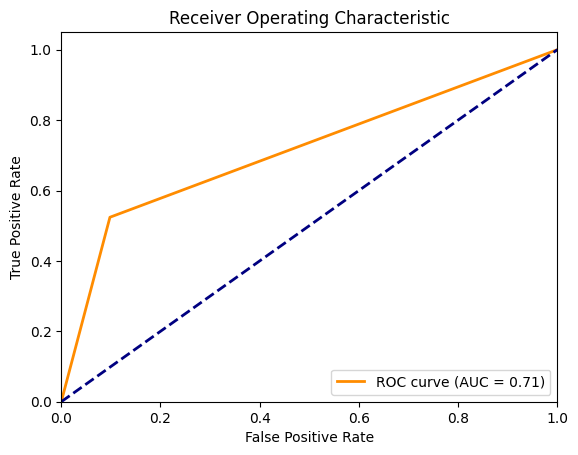

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
roc_auc = roc_auc_score(true_labels, predicted_labels)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### 6. Implement a Python function to plot the precision-recall curve for a classification model.

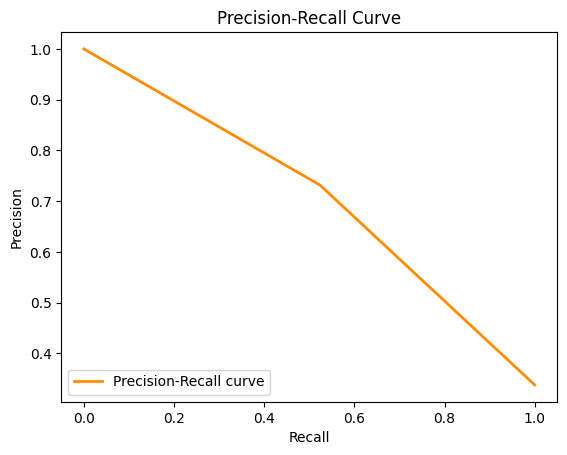

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### 7. Write a Python function to calculate the log-loss (cross-entropy loss) for a classification problem.

In [ ]:
from sklearn.metrics import log_loss

logloss = log_loss(true_labels, predicted_labels)
print("Log-Loss:", logloss)

Log-Loss: 8.132593273717768


### 8. Create a Python function to calculate the Matthews Correlation Coefficient for evaluating the quality of binary classification.

In [ ]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(true_labels, predicted_labels)
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: 0.47038922268473443


### 9. Implement a Python script that generates a classification report, including precision, recall, F1-score, and support for each class in a multi-class classification problem.

In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.52      0.61       187

    accuracy                           0.77       554
   macro avg       0.76      0.71      0.73       554
weighted avg       0.77      0.77      0.76       554



### 10. Define and implement a custom evaluation metric (e.g., balanced accuracy) in Python for a specific classification problem.

In [ ]:
def balanced_accuracy(y_true, y_pred):
    # Custom metric: Balanced Accuracy
    # Calculate accuracy for each class and take the average
    return (recall_score(y_true, y_pred, average='macro') + precision_score(y_true, y_pred, average='macro')) / 2.0

balanced_acc = balanced_accuracy(true_labels, predicted_labels)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.7363525124371377


## **Problems based on Decision Tress**:

---

### 1. Explain the concept of pruning in decision trees. Compare and contrast pre-pruning and post-pruning strategies. Under what circumstances would you prefer one over the other?

  Pruning in decision trees is the process of reducing the size of a tree by removing branches that do not provide significant information. Pre-pruning involves setting stopping criteria during tree construction, such as maximum depth or minimum samples per leaf, to prevent overgrowth. Post-pruning, also known as cost-complexity pruning, involves growing a full tree and then removing branches with the weakest predictive power based on a cost-complexity measure. Pre-pruning is useful when you have a large dataset, while post-pruning is preferred when you have a smaller dataset.

### 2. Define entropy and information gain in the context of decision trees. How are these metrics used to select the best attribute for splitting a node?

  Entropy is a measure of impurity or disorder in a dataset. Information gain is a metric used in decision trees to quantify the reduction in entropy or disorder when splitting a node. It is calculated as the entropy of the parent node minus the weighted average of entropies of child nodes. Information gain is used to select the best attribute for splitting a node because it aims to maximize the reduction in uncertainty.

### 3. Discuss Gini impurity, entropy, and misclassification error as impurity measures for decision trees. Provide scenarios where one measure might be preferred over the others.

  - Gini impurity measures the probability of misclassifying a randomly chosen element if it were labeled randomly. It tends to favor attributes that create equally distributed splits.
  - Entropy measures the level of disorder in a dataset. It is sensitive to the number of classes and favors attributes that create pure splits.
  - Misclassification error counts the fraction of misclassified instances in a node. It is less commonly used compared to Gini and entropy but can be used when dealing with class-imbalanced datasets.

### 4. Describe the strategies for handling missing values when building decision trees. How does the decision tree algorithm handle missing values during attribute selection and splitting?

  Decision trees can handle missing values by:
  - Assigning a missing value to the most frequent class (for categorical attributes).
  - Using surrogate splitting rules to consider alternative branches when a missing value is encountered (for both categorical and numerical attributes).

### 5. Explain how decision tree algorithms handle categorical and numerical attributes differently during the splitting process. What are the common techniques for splitting categorical and numerical attributes?

  - For categorical attributes, decision trees use techniques like one-hot encoding and consider each category as a separate branch.
  - For numerical attributes, decision trees use techniques like binary splitting and choose the best split point based on impurity reduction or information gain.

### 6. How does a decision tree handle multi-class classification problems? Describe the methods used for splitting nodes and determining class labels in such scenarios.

  In multi-class classification, decision trees extend their binary splitting to accommodate multiple classes by considering each class as a potential outcome at each node. The splitting criteria aim to maximize information gain or reduce impurity for multiple classes. The class label is determined by majority voting at the leaf node.

### 7. Discuss techniques for preventing overfitting in decision trees. How can you control the depth of a decision tree, limit the number of leaf nodes, or apply pruning to avoid overfitting?

  To prevent overfitting, you can:
  - Limit the maximum depth of the tree.
  - Set a minimum number of samples required to split a node or create a leaf.
  - Prune the tree after construction using cost-complexity pruning.
  - Use ensemble methods like Random Forests or Gradient Boosting.

### 8. Explain the concept of a random forest. How does it differ from a single decision tree? What advantages does a random forest offer in terms of model performance and generalization?

  Random Forests are an ensemble learning method that combines multiple decision trees. They introduce randomness by selecting random subsets of the data and features for each tree. This reduces overfitting and improves model performance. Random Forests can handle both classification and regression tasks and provide feature importance scores.

### 9. Describe the challenges of using decision trees on imbalanced datasets. What techniques or modifications can be applied to address class imbalance issues when building decision trees?

  Imbalanced datasets pose a challenge for decision trees because they may bias the tree toward the majority class. Techniques to handle imbalance include:
  - Using balanced datasets or resampling methods.
  - Adjusting class weights to penalize misclassification of the minority class.
  - Applying specialized decision tree algorithms like Balanced Random Forests.

### 10. Decision trees are commonly used for classification, but they can also be applied to regression problems. Explain how regression trees differ from classification trees and how they handle continuous target variables.

  Regression trees are used for predicting continuous target variables. Instead of using entropy or Gini impurity, regression trees typically use metrics like mean squared error (MSE) or mean absolute error (MAE) to evaluate splits. They predict the average value of the target variable within each leaf node, making them suitable for regression tasks.

## **Problems on implementation of Decision Trees**:

---

### 1. Write Python code to create a simple decision tree classifier using scikit-learn's `DecisionTreeClassifier`. Train it on a dataset and make predictions.

### 2. How do you tune hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` in a decision tree classifier to improve its performance?

### 3. Explain how to retrieve and interpret feature importances from a trained decision tree classifier.

### 4. Create a function to visualize a decision tree classifier using graphviz.

### 5. Implement k-fold cross-validation for a decision tree classifier and calculate its accuracy.

### 6. Explain the concept of pruning in decision trees. How can you prevent overfitting by pruning a decision tree?

### 7. Describe techniques for dealing with imbalanced datasets when using decision tree classifiers.

### 8. Write Python code to create a simple decision tree regressor using scikit-learn's DecisionTreeRegressor. Train it on a dataset and make predictions.

### 9. What hyperparameters can you tune in a decision tree regressor, and how do they affect the model's performance?

### 10. Create a function to visualize a decision tree regressor using graphviz or matplotlib.

### 11. Explain common evaluation metrics used for decision tree regression models, such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).

### 12. How can you use ensemble methods like Random Forests with decision tree regressors to improve prediction accuracy?

### 13. Implement grid search with cross-validation to find the best hyperparameters for a decision tree classifier on a specific dataset.

### 14. Discuss the importance of feature engineering when working with decision tree models. Provide an example of feature engineering for decision tree classification.

### 15. Describe a real-world problem or use case where decision tree classifiers or regressors would be an appropriate choice of model, and explain why.

### 1. Write Python code to create a simple decision tree classifier using scikit-learn's `DecisionTreeClassifier`. Train it on a dataset and make predictions.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


#Loading Iris dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df.columns = ['column_1', 'column_2', 'column_3', 'column_4']
df['target'] = pd.Series(y)

# Shuffling all the rows' order
df = shuffle(df, random_state = 42)

X = df[['column_1', 'column_2', 'column_3', 'column_4']]
y = df['target']

# Split the dataset into training and test sets with a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier with default parameters
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the test set
accuracy = clf.score(X_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.9333333333333333


In [ ]:
df['target'].unique()

array([1, 0, 2])

### 2. How do you tune hyperparameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` in a decision tree classifier to improve its performance?

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Using the prrrevioously created iris dataset

# Define the hyperparameter space
param_grid = {
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 3, 5],
             }

# Create a decision tree classifier with the default parameters
clf = DecisionTreeClassifier()

# Perform grid search on the decision tree classifier
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the best model
best_model = grid_search.best_estimator_

print(best_model)


DecisionTreeClassifier(max_depth=7)


### 3. Explain how to retrieve and interpret feature importances from a trained decision tree classifier.

To retrieve feature importances from a trained decision tree classifier in scikit-learn, you can use the `feature_importances_` attribute. This attribute is a NumPy array containing the importance of each feature in the classifier.

To interpret feature importances, you can simply look at the values in the `feature_importances_` array. The higher the value, the more important the feature is to the classifier.

### 4. Create a function to visualize a decision tree classifier using graphviz.

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install graphviz

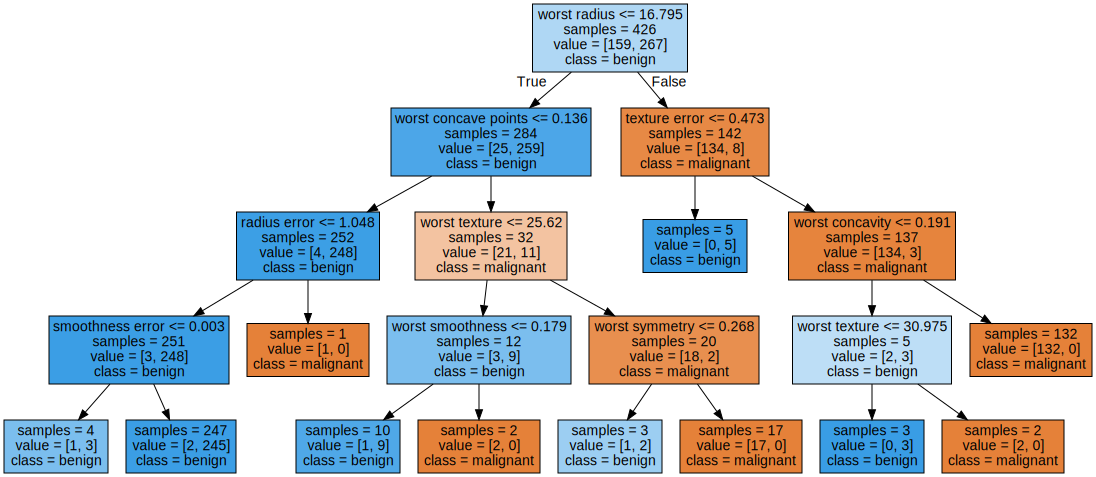

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import graphviz

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 5. Implement k-fold cross-validation for a decision tree classifier and calculate its accuracy.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation (e.g., k=5)
k = 5
scores = cross_val_score(clf, X, y, cv=k)

# Calculate the accuracy for each fold
print("Accuracy for each fold:")
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print(f"\nMean Accuracy: {mean_accuracy:.4f}")

Accuracy for each fold:
Fold 1: 0.9667
Fold 2: 0.9667
Fold 3: 0.9000
Fold 4: 0.9333
Fold 5: 1.0000

Mean Accuracy: 0.9533


### 6. Explain the concept of pruning in decision trees. How can you prevent overfitting by pruning a decision tree?

Pruning in decision trees is a technique that removes unnecessary branches from the tree to improve its performance and prevent overfitting.

Overfitting occurs when a decision tree model learns the training data too well and is unable to generalize to new data. This can result in the model performing poorly on unseen data.

Pruning works by removing branches from the tree that contribute little to the overall accuracy of the model. This is done by evaluating the importance of each branch and removing the branches that are least important.

There are two main types of pruning in decision trees: pre-pruning and post-pruning.

- **Pre-pruning** stops the tree from growing too deep by setting a maximum depth for the tree. This is a simple and effective way to prevent overfitting, but it can also lead to underfitting if the maximum depth is set too low.

- **Post-pruning** allows the tree to grow to its full depth and then removes branches that are not important. This is a more complex technique than pre-pruning, but it can also be more effective at preventing overfitting.

To prevent overfitting by pruning a decision tree, you can use either pre-pruning or post-pruning. You can also experiment with different pruning strategies to find the one that works best for your data.

### 7. Describe techniques for dealing with imbalanced datasets when using decision tree classifiers.

There are a number of techniques for dealing with imbalanced datasets when using decision tree classifiers. Some of the most common techniques include:

- **Resampling:** This technique involves oversampling the minority class or undersampling the majority class to create a more balanced dataset. Oversampling can be done by duplicating examples from the minority class, while undersampling can be done by randomly removing examples from the majority class.
- **Cost-sensitive learning:** This technique involves assigning different costs to different misclassifications. For example, you might assign a higher cost to misclassifying a minority class example than to misclassifying a majority class example. This will encourage the decision tree classifier to learn the minority class better.
- **Ensemble methods:** Ensemble methods involve combining the predictions of multiple decision tree classifiers to produce a more accurate prediction. This can be done by using methods such as bagging and boosting.

### 8. Write Python code to create a simple decision tree regressor using scikit-learn's DecisionTreeRegressor. Train it on a dataset and make predictions.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r'/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/gt_2011.csv')
#The given dataset is having two output columns to predict that is 'CO' and 'NOX'
X = df.drop(columns = ['CO', 'NOX'], axis = 1)
y = df['CO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth as needed

# Train the regressor on the dataset
regressor.fit(X_train, y_train)

# Make predictions on new data points
y_pred = regressor.predict(X_test)

In [ ]:
for i in zip(y_pred,y_test):
  print(i)

(2.2753353240291223, 1.9656)
(1.373100123030758, 0.76573)
(3.460343898916968, 3.2999)
(1.373100123030758, 1.4649)
(1.0319169660194165, 1.4643)
(0.9352860354475714, 1.2185)
(0.9352860354475714, 1.0696)
(1.373100123030758, 1.4864)
(0.9352860354475714, 1.4758)
(1.0319169660194165, 0.8464)
(0.9352860354475714, 1.5547)
(1.373100123030758, 1.3541)
(0.9352860354475714, 1.4597)
(1.373100123030758, 0.93041)
(0.9352860354475714, 0.17862)
(4.8333525, 3.563)
(0.9352860354475714, 0.786)
(0.9352860354475714, 0.62793)
(4.8333525, 4.2272)
(0.9352860354475714, 1.0427)
(0.9352860354475714, 0.9873)
(2.2753353240291223, 1.7305)
(3.460343898916968, 3.9065)
(0.9352860354475714, 0.71066)
(1.373100123030758, 1.5706)
(0.659831202411022, 1.5384)
(0.9352860354475714, 0.59313)
(0.9352860354475714, 1.2075)
(0.659831202411022, 0.53018)
(0.9352860354475714, 1.361)
(0.659831202411022, 0.52233)
(0.9352860354475714, 0.76223)
(6.694316666666667, 5.7213)
(1.373100123030758, 1.1892)
(3.460343898916968, 4.2865)
(0.93528603

### 9. What hyperparameters can you tune in a decision tree regressor, and how do they affect the model's performance?


In a decision tree regressor, several hyperparameters can be tuned to control the behavior of the model and its performance. These hyperparameters affect aspects such as the depth of the tree, the complexity of the model, and its generalization ability. Here are some key hyperparameters and how they affect the model's performance:

- **max_depth:** This hyperparameter controls the maximum depth of the decision tree. A deeper tree can fit the training data more closely, potentially leading to overfitting. Conversely, a shallower tree may underfit the data. Tuning max_depth helps strike a balance between bias and variance. Smaller values (e.g., 3-10) can help prevent overfitting, while larger values can make the model more expressive.

- **min_samples_split:** This hyperparameter determines the minimum number of samples required to split an internal node further. Increasing min_samples_split can make the tree less deep and helps prevent overfitting by ensuring that each split must have a sufficient number of samples. Smaller values (e.g., 2-10) make the tree deeper, potentially leading to overfitting.

- **min_samples_leaf:** This hyperparameter specifies the minimum number of samples required to be in a leaf node. Similar to min_samples_split, it controls overfitting by limiting the size of leaf nodes. Larger values (e.g., 1-10) lead to simpler trees with fewer leaves.

- **max_features:** It controls the maximum number of features considered when looking for the best split. Smaller values (e.g., "sqrt" or "log2") can introduce randomness and reduce overfitting. Larger values (e.g., None or a specific integer) may lead to overfitting by considering more features.

- **min_impurity_decrease:** This hyperparameter specifies a threshold for the minimum impurity decrease required to make a split. It controls the quality of splits, with higher values leading to less splits and simpler trees.

- **max_leaf_nodes:** It limits the total number of leaf nodes in the tree. Setting this hyperparameter can prevent overfitting by capping the tree's growth.

- **criterion:** The criterion used for measuring the quality of a split, typically "mse" (mean squared error) for regression. You can experiment with alternative criteria if needed.

- **random_state:** This seed value ensures reproducibility of the tree structure. Keeping it fixed helps make the results reproducible.

- **presort:** It's a boolean hyperparameter. If set to True, the algorithm presorts the data, which can speed up training for smaller datasets but is generally not recommended for larger datasets.

### 10. Create a function to visualize a decision tree regressor using graphviz.

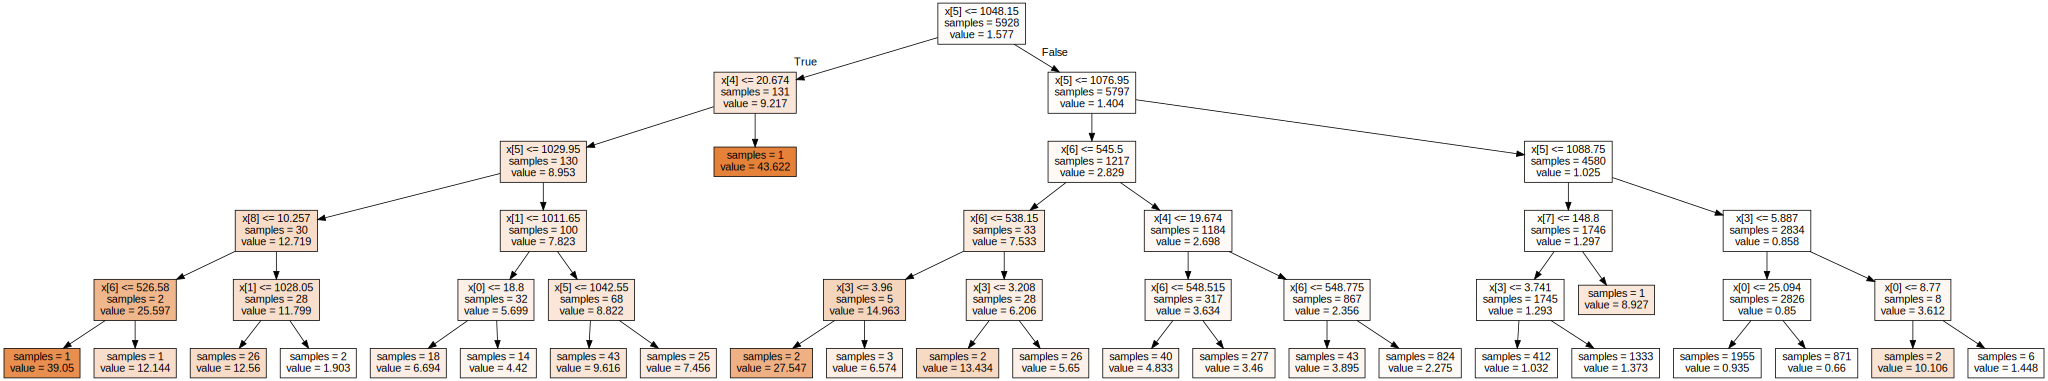

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file="regressor.dot", impurity=False, filled=True)

import graphviz
with open("regressor.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 11. Explain common evaluation metrics used for decision tree regression models, such as Mean Absolute Error (MAE) and Mean Squared Error (MSE).

Common evaluation metrics used for decision tree regression models include Mean Absolute Error (MAE) and Mean Squared Error (MSE).

- **Mean Absolute Error (MAE)** measures the average difference between the predicted values and the actual values. It is calculated as follows:

  $MAE = \frac{Σ|y_{pred} - y_{true}|}{n}$

  where,

  - $n$ is the number of samples
  - $y_pred$ is the predicted value
  - $y_true$ is the actual value

- **Mean Squared Error (MSE)** measures the average squared difference between the predicted values and the actual values. It is calculated as follows:

  $MSE = \frac{ Σ(y_{pred} - y_{true})^2}{n}$

  where,

  - $n$ is the number of samples
  - $y_{pred}$ is the predicted value
  - $y_{true}$ is the actual value
  
MAE and MSE are both useful metrics for evaluating the performance of decision tree regression models. However, they have different strengths and weaknesses.

MAE is more robust to outliers than MSE. This means that MAE is less affected by a few large errors. However, MAE is less sensitive to small errors than MSE.

MSE is more sensitive to small errors than MAE. This means that MSE can detect small changes in the performance of the model. However, MSE is more affected by outliers than MAE.

The best metric to use for evaluating a decision tree regression model will depend on the specific application. If the application is sensitive to outliers, then MAE is the better metric. If the application is sensitive to small errors, then MSE is the better metric.

### 12. How can you use ensemble methods like Random Forests with decision tree regressors to improve prediction accuracy?

Ensemble methods like Random Forests can be used to improve the prediction accuracy of decision tree regressors by combining the predictions of multiple decision tree models. This helps to reduce the variance of the model and improve its overall performance.

Random Forests work by constructing a number of decision trees on different subsets of the training data. Each tree is trained using a random sample of the features and a random sample of the data. The predictions of the individual trees are then averaged to produce the final prediction.

Random Forests have several advantages over single decision tree models:

  - They are less prone to overfitting.
  - They are more robust to noise in the data.
  - They can produce more accurate predictions.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(r'/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/gt_2011.csv')
#The given dataset is having two output columns to predict that is 'CO' and 'NOX'
X = df.drop(columns = ['CO', 'NOX'], axis = 1)
y = df['CO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create a Random Forest regressor with 100 trees
regressor = RandomForestRegressor(n_estimators=100)

# Train the Random Forest regressor on the training set
regressor.fit(X_train, y_train)

# Make predictions on new data points
y_pred = regressor.predict(X_test)

# Calculate the mean squared error of the model on the test set
mse = regressor.score(X_test, y_test)

# Print the mean squared error
print('Mean squared error:', mse)

Mean squared error: 0.6163955474664021


### 13. Implement grid search with cross-validation to find the best hyperparameters for a decision tree classifier on a specific dataset.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# Define the hyperparameter space
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
}

# Create a decision tree classifier with the default parameters
clf = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Select the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = best_model.score(X_test, y_test)

# Print the accuracy
print('Accuracy:', accuracy)

Accuracy: 0.9090909090909091


### 14. Discuss the importance of feature engineering when working with decision tree models. Provide an example of feature engineering for decision tree classification.

Feature engineering is the process of transforming raw data into features that are more informative and predictive for a machine learning model. It is especially important when working with decision tree models, which are sensitive to the quality of the input features.

Decision tree models learn by splitting the data into smaller and smaller subsets based on the values of the features. If the features are not informative or predictive, the model will not be able to learn effectively.

Feature engineering can be used to improve the performance of decision tree models in a number of ways:

  - It can create new features that are more informative and predictive than the original features.
  - It can reduce the dimensionality of the data, which can make the model more efficient and less prone to overfitting.
  - It can encode categorical data in a way that is more compatible with decision tree models.

Here is an example of feature engineering for decision tree classification:

Suppose you are building a decision tree classifier to predict whether a customer will churn. You have the following features:

  - `customer_id`: A unique identifier for each customer.
  - `account_type`: The type of account the customer has (e.g., individual, business).
  - `tenure`: The number of months the customer has been a customer.
  - `monthly_spend`: The average amount the customer spends each month.

You could use the following feature engineering techniques to improve the performance of your decision tree classifier:

  - **Create a new feature** called days_since_last_login: This feature would calculate the number of days since the customer last logged into their account. This feature could be informative for predicting churn, as customers who are less active are more likely to churn.
  - **Reduce the dimensionality** of the monthly_spend feature by binning it: This would group the customers into different categories based on their monthly spend. This could make the feature more informative and predictive, as customers who spend more money each month are less likely to churn.
  - **Encode the account_type feature** as a categorical variable: This would convert the account_type feature to a series of dummy variables, one for each account type. This would make the feature more compatible with decision tree models.

By using these feature engineering techniques, you could improve the performance of your decision tree classifier and make it more accurate at predicting customer churn.

### 15. Describe a real-world problem or use case where decision tree classifiers or regressors would be an appropriate choice of model, and explain why.


Decision tree classifiers and regressors are appropriate for a wide range of real-world problems and use cases. Here are a few examples:

  - **Customer churn prediction:** Decision tree classifiers can be used to predict which customers are likely to churn (cancel their subscription or service). This information can be used to develop targeted retention campaigns.
  - **Fraud detection:** Decision tree classifiers can be used to detect fraudulent transactions, such as credit card fraud and insurance fraud.
  - **Medical diagnosis:** Decision tree classifiers can be used to diagnose diseases and medical conditions, such as cancer and heart disease.
  - **Risk assessment:** Decision tree classifiers can be used to assess the risk of events such as loan defaults and insurance claims.
  - **Price prediction:** Decision tree regressors can be used to predict the price of products and services, such as real estate and stocks.

Decision tree models are appropriate for these problems because they are:

  - **Interpretable:** Decision tree models are easy to understand and interpret, which makes them ideal for problems where it is important to understand why the model is making certain predictions.
  - **Robust:** Decision tree models are robust to noise and outliers in the data.
  - **Flexible:** Decision tree models can be used to solve a wide range of problems, including classification, regression, and anomaly detection.

Here is an example of a real-world use case where a decision tree classifier would be an appropriate choice of model:

A bank wants to develop a model to predict which customers are likely to churn (cancel their account). The bank has data on the following features for each customer:

  - `Customer ID`: A unique identifier for each customer.
  - `Account type`: The type of account the customer has (e.g., checking, savings, credit).
  - `Account balance`: The current balance of the customer's account.
  - `Number of transactions`: The number of transactions the customer has made in the past month.
  - `Average transaction amount`: The average amount of the customer's transactions in the past month.
  - `Days since last login`: The number of days since the customer last logged into their account.

The bank can use a decision tree classifier to predict which customers are likely to churn by training the model on this data. Once the model is trained, the bank can use it to predict the churn probability for each customer. This information can then be used to develop targeted retention campaigns for customers who are at high risk of churning.

## **Problems based on SVM:**

---

### 1. What is an SVM, and what is its primary objective in supervised learning?

Support Vector Machines (SVMs) are a type of supervised learning algorithm that can be used for both classification and regression tasks. However, they are primarily used for classification tasks in machine learning.

The primary objective of an SVM is to find the hyperplane in an n-dimensional space that can separate the data points into different classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVMs work by finding a hyperplane that maximizes the margin between the two classes of data points. The margin is the distance between the hyperplane and the closest data points from each class. By maximizing the margin, SVMs are able to create a decision boundary that is more robust to noise and outliers in the data.

SVMs are a powerful machine learning algorithm that can be used to solve a wide range of classification problems. They are particularly well-suited for problems with high-dimensional data and non-linear class boundaries.

### 2. Explain the concept of a "support vector" in SVM. How are support vectors critical to SVM's decision boundary?

A support vector in SVM is a data point that lies on the hyperplane or is very close to it. Support vectors are critical to SVM's decision boundary because they define the hyperplane that separates the data points into different classes.

SVMs work by finding the hyperplane that maximizes the margin between the two classes of data points. The margin is the distance between the hyperplane and the closest data points from each class. Support vectors are the data points that lie on the margin or are very close to it.

By maximizing the margin, SVMs are able to create a decision boundary that is more robust to noise and outliers in the data. This is because support vectors are the data points that have the most influence on the position of the hyperplane.

In general, SVMs are able to achieve high accuracy on a wide range of classification problems because of the importance of support vectors. By focusing on the support vectors, SVMs are able to create a decision boundary that is more robust to noise and outliers in the data.

Here are some additional tips for working with support vectors in SVM:

  - Identify the support vectors in your SVM model. This can be done by looking at the coefficients of the hyperplane. The data points with the highest coefficients are the support vectors.
  - Remove any outliers from your dataset before training your SVM model. Outliers can have a negative impact on the performance of SVM models by skewing the position of the hyperplane.
  - Use a validation set to evaluate the performance of your SVM model. This will help you to avoid overfitting the model to the training data.

### 3. What is the margin in an SVM, and why is maximizing the margin important in SVM classification?

The margin in an SVM is the distance between the hyperplane that separates the two classes of data points and the closest data points from each class. Maximizing the margin is important in SVM classification because it helps to create a decision boundary that is more robust to noise and outliers in the data.

Here are some additional benefits of maximizing the margin in SVM classification:

  - **Improved generalization performance:** SVMs with larger margins are more likely to generalize well to new data. This is because SVMs with larger margins are less likely to overfit the training data.
  - **Reduced computational complexity:** SVMs with larger margins can be trained more efficiently than SVMs with smaller margins. This is because SVMs with larger margins require fewer support vectors to define the hyperplane.
  - **Improved interpretability:** SVMs with larger margins are easier to interpret than SVMs with smaller margins. This is because SVMs with larger margins have a simpler decision boundary.

In general, maximizing the margin is an important goal in SVM classification. By maximizing the margin, SVMs are able to create a decision boundary that is more robust to noise and outliers in the data, has better generalization performance, is more computationally efficient, and is more interpretable.

### 4. Describe the difference between linear SVM and non-linear SVM. When would you choose one over the other?

| **Linear SVM** | **Non-linear SVM** |
|---|---|
| A linear SVM finds a hyperplane in the feature space that separates the two classes of data points with the maximum margin. The hyperplane is a flat plane that divides the feature space into two halves. | A non-linear SVM uses a kernel function to transform the data into a higher-dimensional space where it is more likely to be linearly separable. Once the data has been transformed, the non-linear SVM finds a hyperplane in the higher-dimensional space that separates the two classes of data points with the maximum margin. |
| Linear SVMs are simple to train and interpret. However, they can only be used to solve classification problems with linearly separable data. If the data is not linearly separable, then a linear SVM will not be able to find a hyperplane that separates the two classes of data points. | Non-linear SVMs are more complex to train and interpret than linear SVMs. However, they can be used to solve classification problems with non-linearly separable data. |

When to choose linear SVM vs non-linear SVM:

The best way to choose between linear SVM and non-linear SVM is to consider the type of data that you are working with. If the data is linearly separable, then a linear SVM is a good choice. If the data is not linearly separable, then a non-linear SVM is a good choice.

Here are some general guidelines for choosing between linear SVM and non-linear SVM:

- Use a linear SVM if:
  - The data is linearly separable.
  - The data is high-dimensional and the kernel function is computationally expensive to compute.
  - Interpretability is important.
- Use a non-linear SVM if:
  - The data is not linearly separable.
  - The data is low-dimensional and the kernel function is not computationally expensive to compute.
  - Accuracy is more important than interpretability.

### 5. What are kernel functions in the context of SVM, and how do they enable SVMs to handle non-linearly separable data?

**Kernel functions** in the context of SVM are mathematical functions that take two input vectors and return a similarity score. Kernel functions enable SVMs to handle non-linearly separable data by transforming the data into a higher-dimensional space where it is more likely to be linearly separable.

Once the data has been transformed into a higher-dimensional space, the SVM can find a hyperplane in that space that separates the two classes of data points with the maximum margin.

Some common kernel functions used in SVMs include:

- **Linear kernel:** This is the simplest kernel function and it is only suitable for linearly separable data.
- **Polynomial kernel:** This kernel function can be used to create non-linear decision boundaries. The degree of the polynomial kernel controls the complexity of the decision boundary.
- **Gaussian kernel:** This kernel function can also be used to create non-linear decision boundaries. The Gaussian kernel is a good choice for problems where the data is noisy.

### 6. Explain the terms "soft margin" and "hard margin" in SVM. What are the trade-offs between these two approaches?

**Hard margin** SVM aims to find a hyperplane that perfectly separates the data into two classes without any misclassification. Soft margin SVM allows some misclassification by relaxing the hard constraints of Support Vector Machine.

**Hard margin:**

  A hard margin SVM finds a hyperplane in the feature space that separates the two classes of data points with the maximum margin. The margin is the distance between the hyperplane and the closest data points from each class.

  Hard margin SVMs are simple to train and interpret. However, they can only be used to solve classification problems with linearly separable data. If the data is not linearly separable, then a hard margin SVM will not be able to find a hyperplane that separates the two classes of data points.

**Soft margin:**

A soft margin SVM allows some misclassification by relaxing the hard constraints of Support Vector Machine. This is done by introducing a slack variable for each data point. The slack variable allows the data point to be on the wrong side of the hyperplane or within the margin. However, the slack variable incurs a penalty in the objective function of the SVM.

Soft margin SVMs are more complex to train than hard margin SVMs. However, they can be used to solve classification problems with non-linearly separable data.

**Trade-offs between hard margin and soft margin SVMs:**

The main trade-off between hard margin and soft margin SVMs is the accuracy vs. generalization performance. Hard margin SVMs are more likely to overfit the training data, while soft margin SVMs are more likely to generalize well to new data.

Another trade-off is the complexity of the model. Hard margin SVMs are simpler to train and interpret than soft margin SVMs.

**When to use hard margin vs soft margin SVMs:**

If the data is linearly separable and you want to maximize the accuracy of the model, then a hard margin SVM is a good choice. However, if the data is not linearly separable or you want to improve the generalization performance of the model, then a soft margin SVM is a good choice.

You can also try training both hard margin and soft margin SVM models and evaluate their performance on a validation set. The model with the best performance on the validation set is the one that you should use.

Here are some general guidelines for choosing between hard margin and soft margin SVMs:

- Use a hard margin SVM if:
  - The data is linearly separable.
  - You want to maximize the accuracy of the model.
  - Interpretability is important.
- Use a soft margin SVM if:
  - The data is not linearly separable.
  - You want to improve the generalization performance of the model.
  - Accuracy is more important than interpretability.

### 7. What are hyperplanes, and how are they used as decision boundaries in SVM classification?

A hyperplane is a flat subspace of a higher-dimensional space. In the context of SVM classification, a hyperplane is a subspace of one dimension less than the original feature space. For example, if the data is in two dimensions, then the hyperplane is a line. If the data is in three dimensions, then the hyperplane is a plane.

Hyperplanes are used as decision boundaries in SVM classification by finding the hyperplane that separates the two classes of data points with the maximum margin. The margin is the distance between the hyperplane and the closest data points from each class.

Hyperplanes are a powerful tool for SVM classification because they allow SVMs to learn complex decision boundaries, even when the data is not linearly separable. This is done by transforming the data into a higher-dimensional space where it is more likely to be linearly separable.

Here are some additional benefits of using hyperplanes as decision boundaries in SVM classification:

 - **Accuracy:** SVMs with hyperplane decision boundaries are able to achieve high accuracy on a wide range of classification problems.
 - **Robustness:** SVMs with hyperplane decision boundaries are robust to noise and outliers in the data.
 - **Interpretability:** SVMs with hyperplane decision boundaries are relatively easy to interpret, which makes them ideal for problems where it is important to understand why the model is making certain predictions

### 8. Discuss the role of the C parameter in SVM. How does adjusting the C parameter impact the SVM's classification performance and decision boundary?

The C parameter in SVM is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the training error. A higher value of C will result in a larger margin and a more complex decision boundary. A lower value of C will result in a smaller margin and a simpler decision boundary.

Adjusting the C parameter can have a significant impact on the SVM's classification performance and decision boundary. Here is a brief overview of the effects of adjusting the C parameter:

- **Classification performance:** A higher value of C can lead to better classification performance on the training data, but it can also lead to overfitting. A lower value of C can lead to worse classification performance on the training data, but it can also help to prevent overfitting.
- **Decision boundary:** A higher value of C will result in a more complex decision boundary, which can be better at fitting the training data. However, it is also more likely to overfit the training data. A lower value of C will result in a simpler decision boundary, which is less likely to overfit the training data.

Here are some general guidelines for choosing the right value of C:

- Use a higher value of C if:
  - You are working with a small dataset and you want to maximize the accuracy of the model on the training data.
  - The data is noisy or there are outliers in the data.
- Use a lower value of C if:
  - You are working with a large dataset and you want to prevent overfitting.
  - The data is clean and there are no outliers in the data.

### 9. What is the "kernel trick," and why is it beneficial when working with non-linear data in SVM?

The kernel trick is a technique that allows SVMs to learn non-linear decision boundaries by transforming the data into a higher-dimensional space where it is more likely to be linearly separable.

SVMs work by finding a hyperplane in the feature space that separates the two classes of data points with the maximum margin. The margin is the distance between the hyperplane and the closest data points from each class.

If the data is not linearly separable in the original feature space, then the SVM will not be able to find a hyperplane that separates the two classes of data points with the maximum margin.

The kernel trick solves this problem by transforming the data into a higher-dimensional space where it is more likely to be linearly separable. Once the data has been transformed, the SVM can find a hyperplane in the higher-dimensional space that separates the two classes of data points with the maximum margin.

The kernel trick is beneficial when working with non-linear data in SVM because it allows SVMs to learn complex decision boundaries without having to explicitly map the data to a higher-dimensional space. This can be computationally expensive, especially for high-dimensional data.

### 10. What are some advantages and disadvantages of using SVMs compared to other classification algorithms, such as logistic regression or decision trees?

- **SVM**
  - **Advantages of SVMs:**

    - **High accuracy:** SVMs are able to achieve high accuracy on a wide range of classification problems.
    - **Robustness:** SVMs are robust to noise and outliers in the data.
    - **Interpretability:** SVMs are relatively easy to interpret, which makes them ideal for problems where it is important to understand why the model is making certain predictions.
Ability to learn non-linear decision boundaries: SVMs can be used to learn non-linear decision boundaries by using the kernel trick.

  - **Disadvantages of SVMs:**

    - **Computational complexity:** SVMs can be computationally expensive to train, especially for large datasets.
    - **Sensitivity to hyperparameters:** SVMs are sensitive to the choice of hyperparameters, such as the C parameter and the kernel function. It is important to choose the right hyperparameters for your specific problem.

- **Logistics regression**

  - **Advantages of logistic regression:**

    - **Simplicity:** Logistic regression is a relatively simple algorithm to understand and implement.
    - **Interpretability:** Logistic regression is very interpretable, which makes it ideal for problems where it is important to understand why the model is making certain predictions.
    - **Computational efficiency:** Logistic regression is computationally efficient to train, even for large datasets.

  - **Disadvantages of logistic regression:**

    - **Assumption of linearity:** Logistic regression assumes that the relationship between the independent variables and the dependent variable is linear. If the relationship is not linear, then logistic regression may not perform well.
    - **Sensitivity to outliers:** Logistic regression can be sensitive to outliers in the data. It is important to remove outliers from the data before training a logistic regression model.

- **Decision trees**

  - **Advantages of decision trees:**

    - **Interpretability:** Decision trees are very interpretable, which makes them ideal for problems where it is important to understand why the model is making certain predictions.
    - **Robustness:** Decision trees are robust to noise and outliers in the data.
    - **Ability to learn non-linear relationships:** Decision trees can be used to learn non-linear relationships between the independent variables and the dependent variable.

  - **Disadvantages of decision trees:**

    - **Overfitting:** Decision trees are prone to overfitting, which can lead to poor performance on new data. It is important to use techniques such as pruning to prevent overfitting.
    - **Computational complexity:** Decision trees can be computationally expensive to train, especially for large datasets.

### 11. Write Python code to create a simple SVM classifier using scikit-learn's SVC (Support Vector Classification). Train it on a dataset and evaluate its accuracy on a test set.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset as an example
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


### 12. Implement grid search with cross-validation to find the best combination of hyperparameters (such as kernel type, C parameter) for an SVM classifier on a specific dataset.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the dataset (you can replace this with your own dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10],
}

# Create an SVM classifier
svm = SVC()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) from the grid search
best_svm = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_svm.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Test Accuracy: 1.0


### 13. Create an SVM classifier to perform multiclass classification using the one-vs-one or one-vs-rest approach. Train the classifier on a dataset with more than two classes and evaluate its performance.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load a dataset with more than two classes (e.g., the Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier using the one-vs-one (OvO) approach
svm_ovo = SVC(decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train, y_train)
y_pred_ovo = svm_ovo.predict(X_test)

# Create an SVM classifier using the one-vs-rest (OvR) approach
svm_ovr = SVC(decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train, y_train)
y_pred_ovr = svm_ovr.predict(X_test)

# Evaluate the performance of the OvO SVM
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
classification_report_ovo = classification_report(y_test, y_pred_ovo, target_names=iris.target_names)

# Evaluate the performance of the OvR SVM
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
classification_report_ovr = classification_report(y_test, y_pred_ovr, target_names=iris.target_names)

# Print the results
print("One-vs-One (OvO) SVM:")
print(f"Accuracy: {accuracy_ovo:.2f}")
print("Classification Report:")
print(classification_report_ovo)

print("\nOne-vs-Rest (OvR) SVM:")
print(f"Accuracy: {accuracy_ovr:.2f}")
print("Classification Report:")
print(classification_report_ovr)

One-vs-One (OvO) SVM:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


One-vs-Rest (OvR) SVM:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 14. Write Python code to create an SVM regressor using scikit-learn's SVR (Support Vector Regression). Train it on a dataset and calculate evaluation metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE) on a test set.

In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/gt_2011.csv')
#The given dataset is having two output columns to predict that is 'CO' and 'NOX'
X = df.drop(columns = ['CO', 'NOX'], axis = 1)
y = df['CO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create an SVR regressor
svr = SVR(kernel='linear', C=1.0)

# Train the regressor on the training data
svr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Absolute Error (MAE): 0.6240
Mean Squared Error (MSE): 1.4730


### 15. Implement an SVM regression model with a non-linear kernel (e.g., polynomial or radial basis function) to handle non-linear regression problems. Train the model and visualize the regression curve.

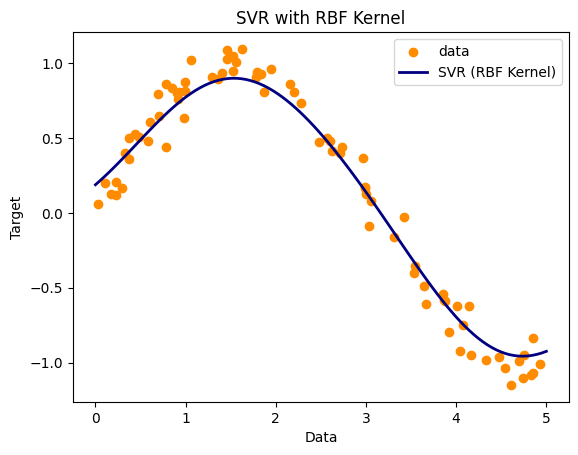

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Generate non-linear data
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Create an SVR regressor with RBF kernel
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Train the SVR model on the data
svr_rbf.fit(X, y)

# Create a test dataset for visualization
X_test = np.linspace(0, 5, 100)[:, np.newaxis]

# Make predictions using the SVR model
y_pred = svr_rbf.predict(X_test)

# Plot the original data and the regression curve
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', lw=2, label='SVR (RBF Kernel)')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('SVR with RBF Kernel')
plt.legend()
plt.show()

## Problems based on Ensemble Techniques:

---

### 1. What is an ensemble learning method, and how does it differ from using a single machine learning model?

Ensemble learning is a machine learning technique that combines the predictions of multiple machine learning models to produce a more accurate and robust prediction. Ensemble learning methods differ from using a single machine learning model in a few key ways:

- **Accuracy:** Ensemble learning methods can often achieve higher accuracy than single machine learning models. This is because ensemble learning methods are able to learn from the strengths of multiple models and reduce the weaknesses of each individual model.
- **Robustness:** Ensemble learning methods are more robust to noise and outliers in the data than single machine learning models. This is because ensemble learning methods are able to average out the predictions of multiple models, which can reduce the impact of noise and outliers.
- **Interpretability:** Ensemble learning methods can be more interpretable than single machine learning models. This is because ensemble learning methods can be used to create a single model that is interpretable, even if the individual models are not interpretable.

There are a number of different ensemble learning methods, but some of the most common include:

- **Bagging:** Bagging creates multiple training sets by randomly sampling from the original training set with replacement. Each training set is then used to train a different machine learning model. The predictions of the individual models are then averaged to produce the final prediction.
- **Boosting:** Boosting trains multiple machine learning models sequentially. Each model is trained on the residuals of the previous model. The predictions of the individual models are then weighted and combined to produce the final prediction.
- **Stacking:** Stacking trains multiple machine learning models on different subsets of the data. The predictions of the individual models are then used as input to a final model, which is trained to predict the target variable.

Ensemble learning methods are a powerful tool that can be used to improve the accuracy, robustness, and interpretability of machine learning models. Ensemble learning methods have been used to achieve state-of-the-art results on a wide range of machine learning problems, including classification, regression, and natural language processing.

### 2. Explain the concept of bagging in ensemble learning. Provide an example of a bagging algorithm and discuss how it reduces variance in predictions.

Bagging, also known as bootstrap aggregating, is an ensemble learning method that combines the predictions of multiple machine learning models to produce a more accurate and robust prediction. Bagging works by creating multiple training sets by randomly sampling from the original training set with replacement. Each training set is then used to train a different machine learning model. The predictions of the individual models are then averaged to produce the final prediction.

Here is an example of a bagging algorithm:

 - Create multiple training sets by randomly sampling from the original training set with replacement.
 - Train a different machine learning model on each training set.
 - Make predictions on the new data using each of the individual models.
 - Average the predictions of the individual models to produce the final prediction.

Bagging reduces variance in predictions by averaging out the predictions of multiple models. This is because each model is trained on a different training set, which means that each model will learn different patterns in the data. By averaging the predictions of multiple models, bagging is able to reduce the impact of individual models that learn noisy patterns in the data.

### 3. Describe the difference between bagging and boosting. What are the key characteristics of each approach, and how do they address different challenges in machine learning?

Bagging and boosting are two popular ensemble learning methods that combine the predictions of multiple machine learning models to produce a more accurate and robust prediction. However, there are some key differences between the two approaches.

**Bagging**

  - Bagging, also known as bootstrap aggregating, works by creating multiple training sets by randomly sampling from the original training set with replacement. Each training set is then used to train a different machine learning model. The predictions of the individual models are then averaged to produce the final prediction.

  - Bagging reduces variance in predictions by averaging out the predictions of multiple models. This is because each model is trained on a different training set, which means that each model will learn different patterns in the data. By averaging the predictions of multiple models, bagging is able to reduce the impact of individual models that learn noisy patterns in the data.

  - Bagging is a simple and effective ensemble learning method that can be used to improve the performance of machine learning models on a wide range of problems. It is particularly well-suited for problems where the data is noisy or there are outliers in the data.

**Boosting**

  - Boosting works by training multiple machine learning models sequentially. Each model is trained on the residuals of the previous model. The residuals are the errors that the previous model made on the training data. The predictions of the individual models are then weighted and combined to produce the final prediction.

  - Boosting reduces bias in predictions by sequentially training models on the residuals of the previous models. This means that each model is able to learn from the mistakes of the previous models and improve the overall accuracy of the ensemble.

  - Boosting is a more powerful ensemble learning method than bagging, but it is also more complex and can be more prone to overfitting. Boosting is well-suited for problems where the data is clean and there are no outliers in the data.

| **Characteristic**	| **Bagging** | **Boosting** |
|---|---|---|
| **Training procedure**	| Trains multiple models independently	| Trains multiple models sequentially |
| **Reduces** |	Variance	| Bias |
| **Well-suited for problems with** |	Noisy data, outliers	| Clean data, no outliers |

### 4. What is the role of base learners in boosting algorithms like AdaBoost and Gradient Boosting? How do these base learners contribute to improving the ensemble's performance?

Base learners in boosting algorithms like AdaBoost and Gradient Boosting play a crucial role in improving the ensemble's performance. They are responsible for learning simple rules or patterns from the data. The boosting algorithm then sequentially trains multiple base learners, each focusing on the errors of the previous learner. This process continues until the desired level of performance is achieved.

The choice of base learner is important, but it does not have to be complex. In fact, simple base learners, such as decision trees with a single split, are often used in boosting algorithms. This is because boosting algorithms are able to improve the performance of even weak base learners by sequentially training them on the errors of the previous learners.

Here is a brief overview of how base learners contribute to improving the ensemble's performance in boosting algorithms:

  - **Improved accuracy:** By sequentially training base learners on the errors of the previous learners, boosting algorithms are able to improve the overall accuracy of the ensemble. This is because each base learner is able to learn from the mistakes of the previous learners and improve its performance.
  - **Reduced bias:** Boosting algorithms can also help to reduce the bias of the ensemble. This is because each base learner is trained on a different distribution of the data, which helps to reduce the overall bias of the ensemble.
  - **Increased robustness:** Boosting algorithms can also make the ensemble more robust to noise and outliers in the data. This is because each base learner is trained on a different subset of the data, which helps to reduce the impact of individual data points on the overall performance of the ensemble.

### 5. Discuss the concept of "wisdom of the crowd" in the context of ensemble techniques. How does combining multiple weak models into a strong ensemble model lead to better predictions?

The concept of "wisdom of the crowd" in the context of ensemble techniques refers to the idea that combining the predictions of multiple weak models can lead to better predictions than using any single model. This is because each model is likely to make different mistakes, and by combining the predictions of multiple models, we can average out these mistakes and improve the overall accuracy of the ensemble.

There are a number of different ensemble techniques, but they all work on the basic principle of combining the predictions of multiple models. Some common ensemble techniques include:

  - **Bagging:** Bagging creates multiple training sets by randomly sampling from the original training set with replacement. Each training set is then used to train a different model. The predictions of the individual models are then averaged to produce the final prediction.
  - **Boosting:** Boosting trains multiple models sequentially. Each model is trained on the residuals of the previous model. The residuals are the errors that the previous model made on the training data. The predictions of the individual models are then weighted and combined to produce the final prediction.
  - **Stacking:** Stacking trains multiple models on different subsets of the data. The predictions of the individual models are then used as input to a final model, which is trained to predict the target variable.

Ensemble techniques can lead to better predictions than using any single model for a number of reasons:

  - **Reduced variance:** Ensemble techniques can help to reduce the variance of the predictions. This is because each model is likely to make different mistakes, and by combining the predictions of multiple models, we can average out these mistakes.
  - **Reduced bias:** Ensemble techniques can also help to reduce the bias of the predictions. This is because each model is likely to learn different patterns in the data, and by combining the predictions of multiple models, we can reduce the impact of individual models that learn biased patterns in the data.
  - **Improved robustness:** Ensemble techniques can also make the predictions more robust to noise and outliers in the data. This is because each model is likely to be affected by noise and outliers in different ways, and by combining the predictions of multiple models, we can reduce the overall impact of noise and outliers.

## **Problems based on PCA:**

---

### 1. What is Principal Component Analysis (PCA) in the context of dimensionality reduction? Explain the primary goal of PCA and how it achieves dimensionality reduction.

Principal Component Analysis (PCA) is a widely used technique in the field of machine learning and statistics for dimensionality reduction and data compression. Its primary goal is to reduce the number of features or variables in a dataset while preserving as much of the original variance and information as possible. PCA achieves this by transforming the data into a new coordinate system defined by the principal components, which are linear combinations of the original features.

Here's how PCA achieves dimensionality reduction:

1. **Standardization:** The first step in PCA is often to standardize the data by subtracting the mean and dividing by the standard deviation for each feature. This step ensures that all features have the same scale and prevents features with larger ranges from dominating the analysis.

2. **Covariance Matrix:** PCA computes the covariance matrix of the standardized data. The covariance matrix describes the relationships between pairs of features in the dataset. It shows how features co-vary or move together.

3. **Eigendecomposition:** Next, PCA performs eigendecomposition on the covariance matrix. This process finds a set of linearly uncorrelated vectors called eigenvectors, each associated with an eigenvalue. These eigenvectors represent the directions of maximum variance in the data.

4. **Principal Components:** The eigenvectors are ranked by their corresponding eigenvalues in descending order. The eigenvector with the highest eigenvalue represents the principal component that captures the most variance in the data. The second-highest eigenvalue corresponds to the second principal component, and so on. These principal components form a new orthogonal basis for the data.

5. **Dimensionality Reduction:** To reduce the dimensionality of the data, you can select a subset of the top principal components. By retaining only the first k principal components (where k is less than the original number of features), you can effectively reduce the dimensionality of the data from n dimensions to k dimensions. This is achieved by projecting the data onto the subspace defined by the selected principal components.

6. **Reconstruction:** If needed, you can reconstruct the original data from the reduced-dimensional representation by reversing the transformation. This allows you to approximate the original data while using fewer features.

### 2. Describe the concept of principal components in PCA. How are principal components calculated, and what do they represent in terms of data variation and orthogonality?

In Principal Component Analysis (PCA), principal components are a set of linearly uncorrelated vectors that represent the directions of maximum variance in a dataset. These components capture the most important information in the data and allow for dimensionality reduction while preserving as much variance as possible. Each principal component is a linear combination of the original features, and they are calculated in a specific way:

1. **Standardization:** Before calculating principal components, it's common practice to standardize the data (subtract the mean and divide by the standard deviation) so that all features have the same scale.

2. **Covariance Matrix:** PCA starts by computing the covariance matrix of the standardized data. The covariance matrix quantifies the relationships between pairs of features in the dataset, showing how they co-vary or move together.

3. **Eigendecomposition:** PCA then performs eigendecomposition on the covariance matrix. Eigendecomposition is a mathematical procedure that decomposes the covariance matrix into a set of eigenvalues and corresponding eigenvectors.

  1. **Eigenvalues:** Eigenvalues represent the amount of variance captured by each principal component. They are non-negative and indicate the importance of each component in terms of explaining the total variance in the data. The eigenvalues are typically ordered in descending order, so the first eigenvalue corresponds to the first principal component, the second eigenvalue to the second principal component, and so on.

  2. **Eigenvectors:** Eigenvectors are the directions in the feature space along which the data varies the most. They represent the directions of the principal components. Each eigenvector is associated with a specific eigenvalue and has a length of 1, making them unit vectors. Importantly, these eigenvectors are orthogonal, meaning they are perpendicular to each other. This orthogonality ensures that each principal component captures a unique and independent source of variation in the data.

3. **Principal Components:** The principal components themselves are the eigenvectors of the covariance matrix. They are often denoted as PC1, PC2, PC3, and so on. PC1 corresponds to the eigenvector associated with the largest eigenvalue and captures the most variance in the data. PC2 corresponds to the second-largest eigenvalue and captures the second most variance, and so forth. Each principal component is a linear combination of the original features and can be expressed as a weighted sum of the features.

### 3. Explain the importance of eigenvalues and eigenvectors in PCA. How are they used to determine the principal components, and what do they reveal about the data?

Eigenvalues and eigenvectors are fundamental components of Principal Component Analysis (PCA) and play a crucial role in determining the principal components and revealing important information about the data:

- **Eigenvalues:**

  - **Importance in PCA:** Eigenvalues represent the amount of variance explained by each principal component. In PCA, eigenvalues are used to rank the principal components in order of significance. Larger eigenvalues correspond to more important principal components, as they capture a greater proportion of the total variance in the data.

  - **Determining Principal Components:** The eigenvalues are typically sorted in descending order. The principal components are then associated with these eigenvalues. The first principal component corresponds to the eigenvector with the largest eigenvalue, the second principal component to the second-largest eigenvalue, and so on. This ranking helps you identify which principal components are most informative for your analysis.

  - **Variance Explained:** The ratio of each eigenvalue to the sum of all eigenvalues gives you the proportion of variance explained by each principal component. This information is valuable for understanding how much of the data's variability is retained when you reduce dimensionality by selecting a subset of principal components.

- **Eigenvectors:**

  - **Importance in PCA:** Eigenvectors are the directions in feature space along which the data varies the most. These vectors define the principal components and are used to transform the data into a new coordinate system.

  - **Determining Principal Components:** Each eigenvector represents a principal component. The eigenvector associated with the largest eigenvalue corresponds to the first principal component, and so on. Eigenvectors are normalized to have a length of 1, which ensures that they define unit vectors in the new coordinate system.

  - **Orthogonality:** Eigenvectors are orthogonal to each other, meaning they are perpendicular in the original feature space. This orthogonality ensures that each principal component captures a unique and independent source of variation in the data. It also simplifies the interpretation of the components, as they are uncorrelated with each other.

  - **Interpretation:** Eigenvectors can provide insights into the relationships between original features and how they contribute to each principal component. By examining the coefficients of each feature in an eigenvector, you can understand which features are most influential in defining a particular principal component.

### 4. Discuss the trade-off between dimensionality reduction and information loss in PCA. How can you decide the number of principal components to retain while minimizing information loss?

The trade-off between dimensionality reduction and information loss is a central consideration in Principal Component Analysis (PCA). PCA aims to reduce the dimensionality of data while preserving as much of the original information or variance as possible. However, reducing dimensionality inevitably leads to some degree of information loss. Here's a discussion of this trade-off and how to decide the number of principal components to retain while minimizing information loss:

1. **Variance Explained:**

  - PCA's primary goal is to capture the most variance in the data using a smaller number of principal components.

  - The variance explained by each principal component is indicated by its associated eigenvalue. Larger eigenvalues correspond to principal components that capture more variance.

  - To assess the trade-off, you can examine the cumulative explained variance by adding up the eigenvalues in descending order. The ratio of the cumulative explained variance to the total variance gives you a measure of how much information is retained.

2. **Scree Plot:**

  - A scree plot is a graphical representation of eigenvalues sorted in descending order. It helps you visualize the rate at which variance is explained by each principal component.

  - In a scree plot, you look for an "elbow" point. This is the point at which adding more principal components results in diminishing returns in terms of explained variance. The number of components before the elbow is a common heuristic for selecting the number of components to retain.

3. **Explained Variance Threshold:**

  - Another approach is to set a threshold for the explained variance. For example, you might decide to retain enough principal components to explain at least 95% of the total variance. You then count the number of components required to meet this threshold.

  - This method allows you to control the level of information loss. A higher threshold retains more information but may result in more retained dimensions.

4. **Cross-Validation:**

  In some cases, you can use cross-validation to determine the optimal number of principal components for a specific task, such as classification or regression. You train your model with different numbers of components and evaluate its performance on a validation set to find the number that balances dimensionality reduction and predictive accuracy.

5. **Domain Knowledge:**

  Consider your domain expertise and the specific goals of your analysis. Sometimes, domain knowledge can guide you in selecting the number of components that are most meaningful for your problem.

6. **Visualization:**

  PCA can be used for data visualization. You can create scatter plots or other visualizations using different combinations of principal components to see how well they capture the structure and separability in your data.


### 5. How does PCA differ from feature selection methods in machine learning? What are the advantages and limitations of using PCA for feature reduction compared to other techniques like feature selection or feature extraction?

Differences between PCA and feature selection:

| **Characteristics** | **PCA** | **Feature Selection** |
|---|---|---|
| **Approach** | PCA is a dimensionality reduction technique that creates new features (principal components) that are linear combinations of the original features. These new features aim to capture as much variance as possible in the data. | Feature selection methods involve choosing a subset of the original features while discarding others based on certain criteria. It does not create new features but selects the most informative ones. |
| **Information Preservation** | PCA retains information by creating linear combinations of features, potentially preserving correlated information across features. It aims to capture global data patterns. | Feature selection directly chooses a subset of original features, which may lead to the loss of potentially useful information if features are interdependent. |
| **Dimensionality Reduction** | PCA reduces dimensionality by creating a smaller set of orthogonal principal components. The number of components can be chosen based on the desired level of variance retention. | Feature selection reduces dimensionality by selecting a subset of the original features. The number of features is determined by the selection criteria. |

**Advantages of PCA for Feature Reduction:**

  - **Multivariate Relationships:** PCA can capture complex multivariate relationships among features, making it suitable for scenarios where features are highly correlated.

  - **Dimensionality Reduction:** PCA effectively reduces dimensionality by creating a smaller number of principal components that retain most of the variance in the data.

  - **Noise Reduction:** By emphasizing the most significant sources of variation and suppressing noise, PCA can improve the robustness of models.

  - **Visualization:** PCA can be used for data visualization, helping to understand the data's structure in lower-dimensional space.

**Limitations of PCA for Feature Reduction:**

  - **Linearity Assumption:** PCA assumes that the underlying data relationships are linear. If the data has nonlinear relationships, PCA may not perform optimally.

  - **Interpretability:** While PCA provides a reduction in dimensionality, the resulting principal components may not have clear interpretability in terms of the original features.

  - **Loss of Feature Meanings:** PCA creates new features that are linear combinations of the originals, making it challenging to relate the principal components back to the original variables.

  - **Variance Emphasis:** PCA prioritizes variance as the criterion for dimensionality reduction. In some cases, other criteria, such as feature importance for a specific task, may be more relevant.

**Feature Selection vs. Feature Extraction (PCA):**

  - **Feature Selection vs. Feature Extraction:** Feature selection retains a subset of the original features, while feature extraction (such as PCA) creates new features.

  - **Interpretability:** Feature selection retains the original features, which are often more interpretable than principal components. Feature extraction methods like PCA may lack interpretability.

  - **Computation:** Feature selection is computationally less intensive since it involves choosing from the existing features. Feature extraction methods, especially when the number of features is large, can be more computationally demanding.

### 6. Write Python code to perform PCA on a dataset using scikit-learn's PCA class. Reduce the dimensionality of the data and visualize the explained variance ratio for each principal component.

### 7. Implement PCA as a feature engineering technique. Use scikit-learn's PCA to reduce the dimensionality of the feature set while preserving a specified percentage of variance. Train a machine learning model on the transformed data and evaluate its performance.

### 8. Create a Python program that applies PCA to grayscale images. Use scikit-learn's PCA to reduce the dimensionality of the image while maintaining image quality. Visualize the original and compressed images.

### 9. Use PCA for anomaly detection. Load a dataset containing both normal and anomalous data points. Apply PCA to reduce dimensionality and detect anomalies based on a threshold. Evaluate the model's performance in terms of precision, recall, and F1-score.

### 10. Implement PCA as a feature selection technique. Load a dataset and apply scikit-learn's PCA. Select the top-k principal components based on a specified criteria (e.g., explained variance ratio or a fixed number of components). Train a machine learning model using these selected features and evaluate its performance.


### 6. Write Python code to perform PCA on a dataset using scikit-learn's PCA class. Reduce the dimensionality of the data and visualize the explained variance ratio for each principal component.

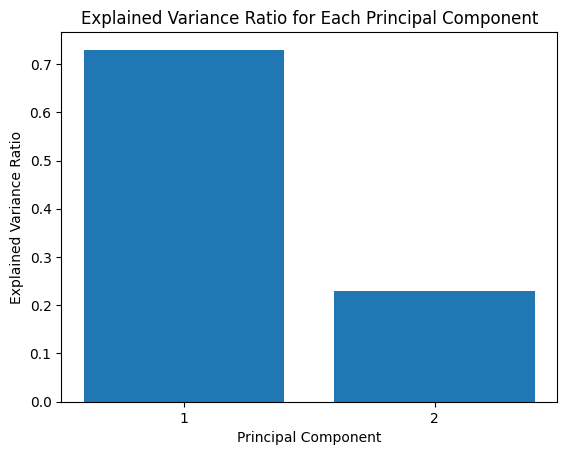

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset (you can replace this with your own dataset)
data = load_iris()
X = data.data  # Features

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the desired number of components
n_components = 2  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data and transform it
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Visualize the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, n_components + 1))
plt.show()

### 7. Implement PCA as a feature engineering technique. Use scikit-learn's PCA to reduce the dimensionality of the feature set while preserving a specified percentage of variance. Train a machine learning model on the transformed data and evaluate its performance.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (Iris dataset for demonstration)
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Specify the desired explained variance ratio (e.g., 95%)
desired_variance_ratio = 0.95

# Initialize PCA to preserve the specified variance
pca = PCA(n_components=desired_variance_ratio, svd_solver='auto')

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a machine learning model (Random Forest Classifier) on the transformed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on the transformed data: {accuracy:.2f}")

Accuracy of the model on the transformed data: 0.96


### 8. Create a Python program that applies PCA to grayscale images. Use scikit-learn's PCA to reduce the dimensionality of the image while maintaining image quality. Visualize the original and compressed images.

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


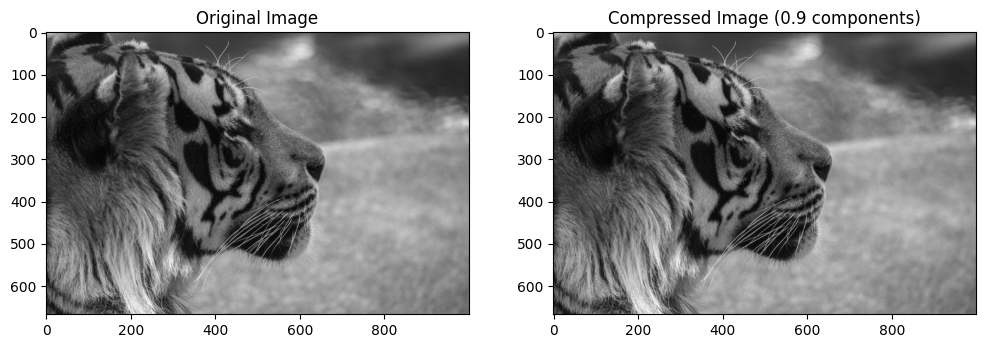

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.decomposition import PCA

# Step 1: Load a grayscale image
image_url = '/content/drive/MyDrive/Assignment Questions/Test/Machine_Learning_Test/image.jpg'  # Replace with your image URL
image = io.imread(image_url)

# Step 2: Preprocess the image
if len(image.shape) == 3:  # Ensure it's a grayscale image
    image = color.rgb2gray(image)

# Step 3: Reshape the image as a 1D array
height, width = image.shape
image_1d = image.reshape(-1)

# Step 4: Apply PCA to reduce dimensionality
n_components = 0.9  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
image_pca = pca.fit_transform(image_1d.reshape(1, -1))

# Step 5: Reconstruct the image from the reduced components
image_reconstructed = pca.inverse_transform(image_pca)

# Reshape the reconstructed image back to its original shape
image_reconstructed = image_reconstructed.reshape(height, width)

# Step 6: Visualize the original and compressed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title(f'Compressed Image ({n_components} components)')

plt.show()

### 9. Use PCA for anomaly detection. Load a dataset containing both normal and anomalous data points. Apply PCA to reduce dimensionality and detect anomalies based on a threshold. Evaluate the model's performance in terms of precision, recall, and F1-score.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
#Loading Iris dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X)
df.columns = ['column_1', 'column_2', 'column_3', 'column_4']
df['target'] = pd.Series(y)

#Removing the rows with having target value 2
df = df[df['target'] != 2]

# Shuffling all the rows' order
df = shuffle(df, random_state = 42)

X = df[['column_1', 'column_2' , 'column_3', 'column_4']]
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(svd_solver='auto')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(np.sum((X_train_scaled - pca.inverse_transform(X_train_pca))**2, axis=1), 95)

# Detect anomalies based on the threshold
y_pred = np.sum((X_test_scaled - pca.inverse_transform(X_test_pca))**2, axis=1) > threshold

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Precision: 0.00
Recall: 0.00
F1-score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 10. Implement PCA as a feature selection technique. Load a dataset and apply scikit-learn's PCA. Select the top-k principal components based on a specified criteria (e.g., explained variance ratio or a fixed number of components). Train a machine learning model using these selected features and evaluate its performance.

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Step 2: Preprocess the data (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Select the top-k principal components based on explained variance ratio
k = 2  # You can change this value based on your criteria
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
selected_pca = X_pca[:, :k]

# Step 5: Train a machine learning model
X_train, X_test, y_train, y_test = train_test_split(selected_pca, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with {k} principal components: {accuracy:.2f}")

Accuracy with 2 principal components: 0.96


## **Problems based on Clustering:**

---

### 1. What is clustering in machine learning, and what are its primary objectives? Explain the difference between clustering and classification.

Clustering in machine learning is a type of unsupervised learning, which means that the algorithm is not trained on a labeled dataset. Instead, it groups similar data points together based on some measure of similarity. The primary objectives of clustering are to:

Identify groups of similar data points: This can be useful for understanding the structure of a dataset or for finding hidden patterns.
Segment a population: Clustering can be used to divide a population into different groups based on their characteristics. This can be useful for targeted marketing or for identifying different customer segments.
Reduce dimensionality: Clustering can be used to reduce the dimensionality of a dataset by grouping similar data points together. This can make the dataset easier to visualize and analyze.
Classification is another type of machine learning, but it is a supervised learning task. In classification, the algorithm is trained on a labeled dataset, and it learns to predict the class label of a new data point based on its features.

The main difference between clustering and classification is that clustering is unsupervised, while classification is supervised. This means that clustering does not require a labeled dataset, while classification does.

| **Feature** |	**Clustering** | **Classification** |
|---|---|---|
| Type of learning | Unsupervised | Supervised |
| Requirement for labeled data? | No | Yes |
| Goal | Group similar data points together | Predict the class label of a new data point |

### 2. Describe the K-Means clustering algorithm. How does it work, and what are the key steps involved in the K-Means clustering process?


K-means clustering is a simple and efficient unsupervised machine learning algorithm for clustering data points into a predefined number of clusters. It is a centroid-based algorithm, which means that each cluster is represented by a centroid, which is the average of all the data points in the cluster.

The K-means clustering algorithm works as follows:

  - Choose the number of clusters, K. This is an important step, as the performance of the algorithm will depend on the value of K. K should be chosen carefully based on the dataset and the desired outcome.
  - Initialize the cluster centroids. This can be done randomly or using a heuristic method.
  - Assign each data point to the cluster with the nearest centroid.
  - Update the cluster centroids by averaging the data points in each cluster.
  - Repeat steps 3 and 4 until the cluster assignments no longer change.

The algorithm terminates when the cluster assignments no longer change, which means that the algorithm has found a local minimum of the within-cluster sum of squares (WCSS). WCSS is a measure of how well the data points are grouped into clusters.

The key steps involved in the K-means clustering process:

  - Choose the number of clusters, K.
  - Initialize the cluster centroids.
  - Assign each data point to the cluster with the nearest centroid.
  - Update the cluster centroids by averaging the data points in each cluster.
  - Repeat steps 3 and 4 until the cluster assignments no longer change.

### 3. Explain the concept of distance metrics in clustering. Discuss common distance measures used in clustering algorithms and their suitability for different types of data.

A distance metric in clustering is a function that measures the similarity between two data points. It is used to determine which data points should be grouped together into clusters. The choice of distance metric is an important one, as it can have a significant impact on the clustering results.

Some common distance measures used in clustering algorithms include:

  - Euclidean distance: This is the most common distance metric, and it is the default distance metric used in many clustering algorithms, such as K-means clustering. Euclidean distance is the square root of the sum of the squared differences between the two data points.
  - Manhattan distance: This distance metric is also known as the city block distance. It is calculated by summing the absolute values of the differences between the two data points.
  - Minkowski distance: This distance metric is a generalization of the Euclidean and Manhattan distance metrics. It is calculated by raising the sum of the squared differences between the two data points to a power, p. The value of p determines the shape of the distance metric. For example, when p = 2, the Minkowski distance is equal to the Euclidean distance, and when p = 1, the Minkowski distance is equal to the Manhattan distance.
  - Cosine similarity: This distance metric measures the similarity between two vectors. It is calculated by dividing the dot product of the two vectors by the product of their magnitudes.
  - Jaccard similarity: This distance metric measures the similarity between two sets. It is calculated by dividing the number of elements that are common to both sets by the number of elements that are in either set.

### 4. Discuss the challenges and limitations of K-Means clustering. What are the assumptions made by the algorithm, and when might it fail to produce meaningful clusters?

K-Means clustering is a simple and efficient unsupervised machine learning algorithm for clustering data points into a predefined number of clusters. However, it has a number of challenges and limitations:

  - Sensitivity to the initialization of cluster centroids: K-Means clustering is sensitive to the initialization of the cluster centroids. If the cluster centroids are not initialized well, the algorithm may converge to a local minimum of the within-cluster sum of squares (WCSS), which may not be the global minimum.
  - Assumption of spherical clusters: K-Means clustering assumes that the clusters are spherical. This means that the data points in each cluster are evenly distributed around the cluster centroid. If the clusters are not spherical, K-Means clustering may not produce meaningful results.
  - Requirement to specify the number of clusters, K: K-Means clustering requires the user to specify the number of clusters, K. This can be a difficult task, especially if the user does not have prior knowledge about the data. If the wrong value of K is chosen, the algorithm may not produce meaningful results.
  - Inability to handle outliers: K-Means clustering is sensitive to outliers. Outliers can distort the cluster centroids and affect the assignment of data points to clusters.
  - Inability to handle high-dimensional data: K-Means clustering can be computationally expensive to run on high-dimensional data.

K-Means clustering may fail to produce meaningful clusters when:

  - The clusters are not spherical.
  - The number of clusters, K, is not chosen correctly.
  - The data contains outliers.
  - The data is high-dimensional.

### 5. What is hierarchical clustering, and how does it differ from partitioning-based clustering algorithms like K-Means? Provide an overview of the linkage methods used in hierarchical clustering.

Hierarchical clustering is a type of unsupervised machine learning algorithm that groups data points into a hierarchy of clusters. The hierarchy of clusters is represented by a dendrogram, which is a tree-like diagram that shows how the clusters are related to each other.

Hierarchical clustering differs from partitioning-based clustering algorithms like K-Means in a number of ways. First, hierarchical clustering does not require the user to specify the number of clusters. Instead, the algorithm produces a hierarchy of clusters, and the user can choose the number of clusters at any level of the hierarchy. Second, hierarchical clustering can handle non-spherical clusters. Partitioning-based clustering algorithms like K-Means assume that the clusters are spherical, but hierarchical clustering does not make this assumption. Third, hierarchical clustering can handle outliers. Partitioning-based clustering algorithms can be sensitive to outliers, but hierarchical clustering is more robust to outliers.

Linkage methods are used in hierarchical clustering to determine how to merge clusters together. The most common linkage methods are:

  - Single linkage: This method merges the two clusters with the closest pair of data points.
  - Complete linkage: This method merges the two clusters with the farthest pair of data points.
  - Average linkage: This method merges the two clusters that minimize the average distance between the data points in the two clusters.
  - Ward's method: This method merges the two clusters that minimize the increase in the within-cluster variance.
  - Different linkage methods can produce different clustering results. The best linkage method to use will depend on the specific clustering task and the type of data being clustered.

### 6. Write Python code to perform K-Means clustering on a dataset using scikit-learn's KMeans class. Visualize the clustered data points and centroids. Experiment with different values of K.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

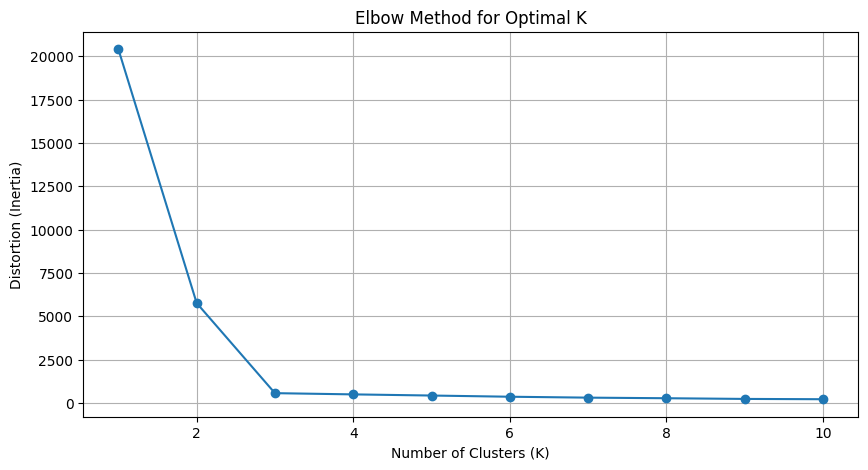

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


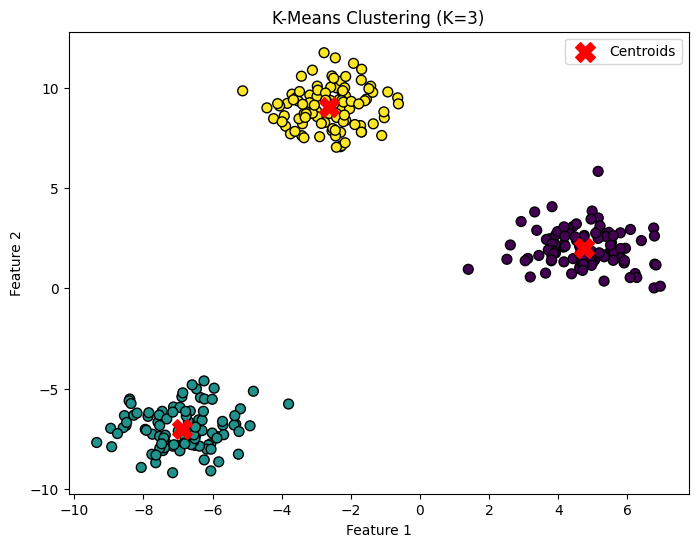

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Create an array to store the distortions (inertia) for different values of K
distortions = []

# Define a range of K values to experiment with
K_range = range(1, 11)

# Perform K-Means clustering for different K values and calculate distortions
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=random_state)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot distortions vs. K values to help choose an appropriate K
plt.figure(figsize=(10, 5))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.grid()
plt.show()

# Based on the elbow method, choose an optimal K value (in this case, K=3)

# Perform K-Means clustering with the chosen K
optimal_K = 3
kmeans = KMeans(n_clusters=optimal_K, random_state=random_state)
kmeans.fit(X)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clustered data points and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50, marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1,], c='red', s=200, marker='X', label='Centroids')
plt.title(f'K-Means Clustering (K={optimal_K})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### 7. Implement hierarchical clustering using scikit-learn's AgglomerativeClustering. Load a dataset and create a dendrogram to visualize the hierarchical clustering process. Discuss the choice of linkage methods (e.g., single, complete, average).

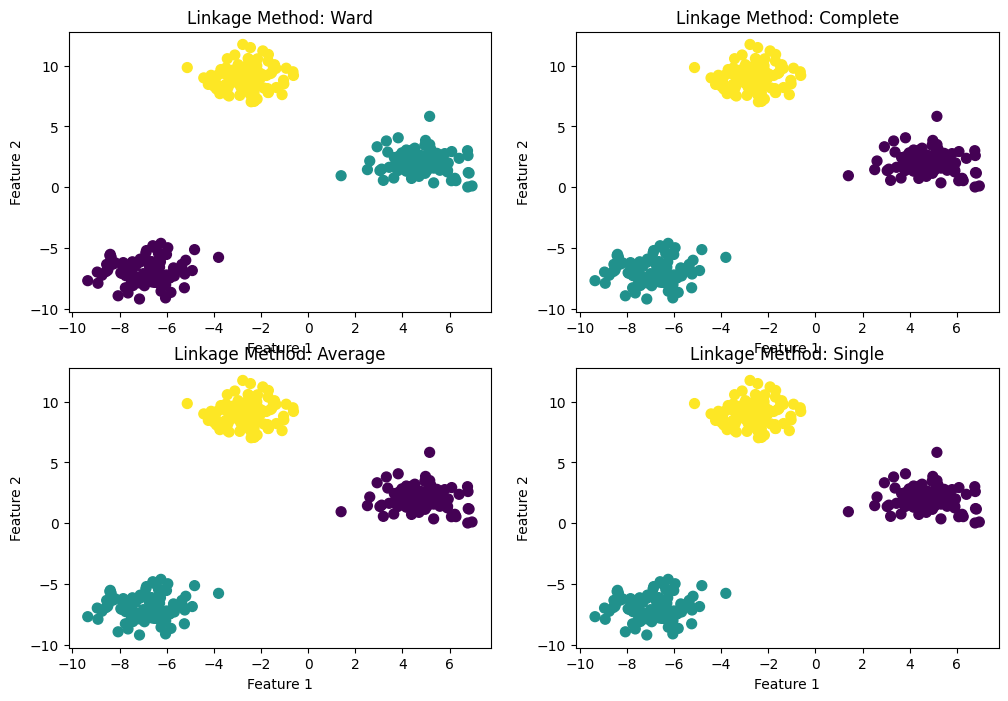

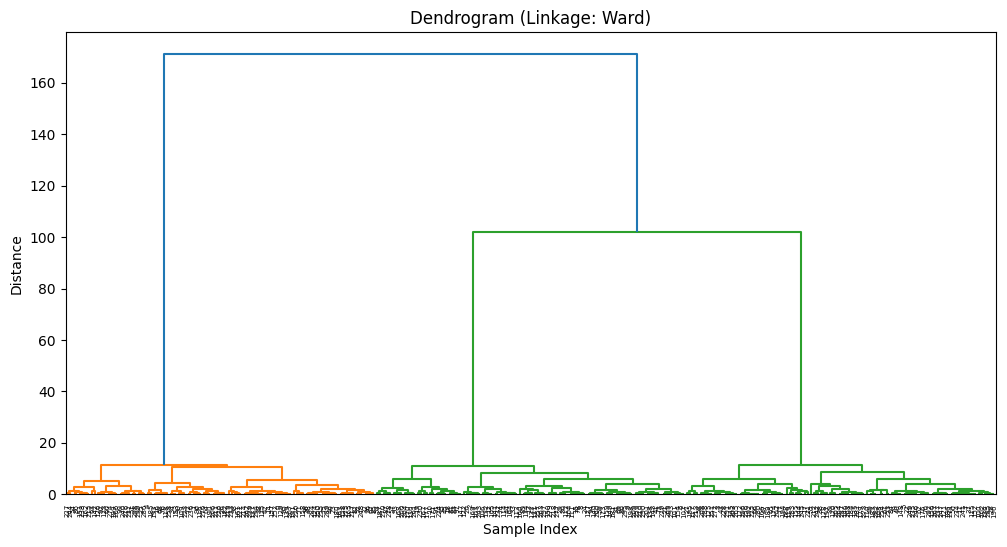

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)

# Perform hierarchical clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
n_linkage_methods = len(linkage_methods)

plt.figure(figsize=(12, 8))

for i, linkage_method in enumerate(linkage_methods):
    # Perform Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    cluster_labels = agglomerative.fit_predict(X)

    plt.subplot(2, 2, i + 1)
    plt.title(f'Linkage Method: {linkage_method.capitalize()}')
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

# Create a dendrogram for one of the linkage methods
linkage_method_for_dendrogram = 'ward'  # You can choose any linkage method

linkage_matrix = linkage(X, method=linkage_method_for_dendrogram)
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage: {linkage_method_for_dendrogram.capitalize()})')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

plt.show()

### 8. Create a Python program to perform DBSCAN clustering on a dataset with varying density. Use scikit-learn's DBSCAN class and visualize the resulting clusters. Discuss the significance of hyperparameters like epsilon and minimum samples.

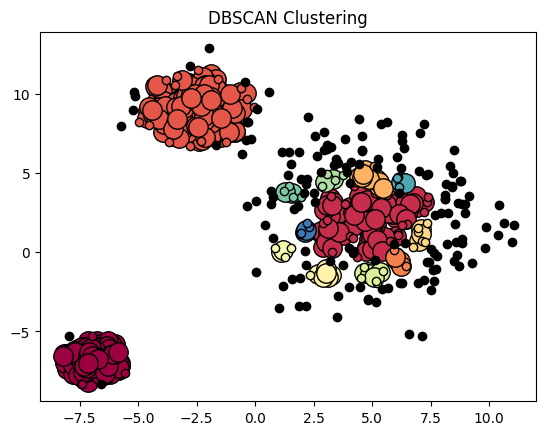

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate a synthetic dataset with varying densities
n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and obtain cluster labels
labels = dbscan.fit_predict(X)

# Visualize the clusters
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = [0, 0, 0, 1]  # Black color for noise points

    class_member_mask = (labels == label)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(color),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering')
plt.show()

### 9. Write Python code to evaluate the quality of clustering results. Load a dataset with ground truth labels and apply K-Means clustering. Use metrics like Adjusted Rand Index (ARI) or Silhouette Score to assess the clustering performance.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load a dataset with ground truth labels (Iris dataset)
data = load_iris()
X = data.data
y_true = data.target

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X_scaled)

# Evaluate clustering performance using ARI
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index (ARI): {ari}")

# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_pred)
print(f"Silhouette Score: {silhouette_avg}")

Adjusted Rand Index (ARI): 0.6201351808870379
Silhouette Score: 0.45994823920518635


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 10. Implement clustering as a technique for anomaly detection. Load a dataset with both normal and anomalous data points. Apply K-Means or DBSCAN clustering and identify anomalies based on cluster assignment and distance metrics.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min

# Generate synthetic data with normal and anomalous points
n_samples = 1000
n_clusters = 5
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.0, random_state=42)
anomalies = np.array([[0, 10], [5, -5], [-5, 5]])  # Manually introduce anomalies
X = np.vstack([X, anomalies])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Calculate distances to the nearest cluster center for each point
distances = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)[1]

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(distances, 95)  # Example: 95th percentile

# Identify anomalies based on distance metrics
anomaly_indices = np.where(distances > threshold)[0]
anomalies_detected = X[anomaly_indices]

print("Anomalies Detected:")
print(anomalies_detected)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Anomalies Detected:
[[ -6.10792848  -9.72865221]
 [ -5.85705676  -4.44035719]
 [ -9.3901859    9.8817222 ]
 [ -9.94169436   5.17063232]
 [ -0.11337398   7.29920009]
 [  5.2726607    4.24386254]
 [ -0.19453906   7.14702094]
 [ -5.12894273   9.83618863]
 [ -8.32764109  -9.07891555]
 [ -7.87101954  -9.03349971]
 [ -5.88161708  -9.77636497]
 [  2.16823434   1.17627443]
 [  6.70062676   3.72851053]
 [ -8.44974915   9.81652243]
 [-11.20126019   6.31379221]
 [  1.94299219   1.91887482]
 [ -7.56777754  -4.62767379]
 [ -5.75046496   7.98989849]
 [ -7.33193351  -9.30398892]
 [-11.26256802   8.20756831]
 [  6.52190333   3.31858973]
 [ -7.2962178    9.3296158 ]
 [ -8.9266098    9.90323225]
 [ -8.26919966  -8.52550834]
 [  3.20968629   6.7510152 ]
 [ -6.59045855  -4.42480945]
 [  7.21323864   2.03238812]
 [  3.75481523   6.3927517 ]
 [ -2.77385446  11.73445529]
 [ -0.37616425   7.06219833]
 [ -9.91046677   4.40217243]
 [-10.00824459   4.4512607 ]
 [  0.21916056   2.57731561]
 [ -0.68093206   4.8393